### Project : Car Price Data  Insights and Forecast


### Objective and Problem Statement

- The main aim of this project is to predict the price of cars using  various Machine Learning (ML) models.
- Examine Underlying Data Insights which enables the buyers to purchase the car based on some factors and from business point of view which variables are significant in predicting the price of a car and How well those variables describe the price of a car.


#### Data Source :https://www.kaggle.com/datasets/harmeetsingh07/exshowroom-price

This dataset contains the number of specifications in a new car like height-weight-length, suspension, body, fuel type, audio system, etc everything in a brand new car and then based on all those features it's ex-showroom price is given

This Dataset contains
Columns: 141 entries
dtypes: float64(6), int64(1), object(134)

### Workflow 

#### Step 1: Basic  Data understanding 

#### Step 2: Data cleaning and Data Feature Engineering

#### Step 3: Data Insights

#### Step 4: Data preparation

#### Step 5: Model building and evaluation

#### Step 6 : Conclusion

#### Step 1:  Basic Data understanding 

#### 1.1  Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
 

#### 1.2 Loading the DataSet

In [2]:
df=pd.read_csv("D:\\python_datascience\\data sets\\cars_engage_2022.csv")


 #### 1.3  Viewing top 5 rows 

In [3]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4 Checking the shape of Data

In [4]:
df.shape

(1276, 141)

number of rows : 1276 

nunber of columns : 141 

####  1.5 Fetching Column names 

In [5]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [6]:
### deleting column name unnamed as it is irrelevant 
df.drop(columns=["Unnamed: 0"],inplace=True)

In [7]:
### checking column count after deleting the above column 
len(df.columns)

140

#### 1.6  Basic information 

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


### Step 2 : Data Cleaning and Feature Engineering

#### 2.1 Checking missing values 

In [9]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

 The data has missing values 

#### 2.2  Computing Missing Values percentage

In [10]:
c=0
for i in df.columns:
    if df[i].isnull().any():
        print(i,"::::",(df[i].isnull().sum()/df.shape[0])*100) ## missing values percentage 
        c=c+1
print(c)


Make :::: 5.877742946708464
Displacement :::: 0.9404388714733543
Cylinders :::: 5.172413793103448
Valves_Per_Cylinder :::: 7.993730407523511
Drivetrain :::: 0.54858934169279
Cylinder_Configuration :::: 1.018808777429467
Emission_Norm :::: 0.8620689655172413
Engine_Location :::: 3.369905956112853
Fuel_System :::: 0.6269592476489028
Fuel_Tank_Capacity :::: 5.407523510971787
Height :::: 0.07836990595611285
Width :::: 0.9404388714733543
Body_Type :::: 0.4702194357366771
Doors :::: 0.3134796238244514
City_Mileage :::: 43.495297805642636
Highway_Mileage :::: 62.695924764890286
ARAI_Certified_Mileage :::: 8.934169278996865
ARAI_Certified_Mileage_for_CNG :::: 97.88401253918495
Kerb_Weight :::: 28.605015673981192
Gears :::: 8.22884012539185
Ground_Clearance :::: 22.648902821316614
Front_Brakes :::: 1.9592476489028214
Rear_Brakes :::: 1.9592476489028214
Front_Suspension :::: 4.623824451410658
Rear_Suspension :::: 3.605015673981191
Front_Track :::: 52.27272727272727
Rear_Track :::: 52.97805642633

#### 2.3 Delete those columns whose misisng value % is greater than 70%

In [11]:
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100>70.0:
        df.drop(columns=[i],inplace=True)

In [12]:
### checking number of columns after deleting columns whose missing values percent is greater than 70 
len(df.columns)

115

Now , column count is 115 

#### Checking types of columns in order to handle the missing values accordingly

In [13]:

df.dtypes

Make                        object
Model                       object
Variant                     object
Ex-Showroom_Price           object
Displacement                object
                             ...  
Rain_Sensing_Wipers         object
Leather_Wrapped_Steering    object
Automatic_Headlamps         object
ASR_/_Traction_Control      object
Cruise_Control              object
Length: 115, dtype: object

#### Checking the count of columns of object type 

In [14]:
len(df.select_dtypes("object").columns)

110

columns of object type count is 110 out of 115

#### Checking the count of columns of numeric type and display them

In [15]:

numeric=["int64","float64"]
print("numeric type columns are ",len(df.select_dtypes(numeric).columns))
df_numeric=df.select_dtypes(numeric) ## saving the records of numeric columns  into df_numeric data frame
df_numeric.head(5)  ## viewing top 5 rows of numeric_df

numeric type columns are  5


,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN


#### Checking missing values count in numeric_df

In [16]:

df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

#### 2.4 Fill the missing values of numeric columns and object columns seperately

#### Fill  the missing values of df_numeric with median since median is robust to outliers 

In [17]:
for i in df_numeric.columns:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i].fillna(df_numeric[i].median(),inplace=True)

#### Checking the missing values count in numeric_df again to verify whether they have been filled or not

In [18]:
df_numeric.isnull().sum()

Cylinders              0
Valves_Per_Cylinder    0
Doors                  0
Seating_Capacity       0
Number_of_Airbags      0
dtype: int64

The missing values of  numeric types columns have been filled now  

#### Fetching all the  columns of object type and save it to df_obj

In [19]:
df_obj=df.select_dtypes("object") ## df_obj is the dataframe having  columns' values of  object type only.
df_obj.head(2)  ### Viewing top 2 rows  of df_obj

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the missing values count in df_obj

In [20]:
df_obj.isnull().sum()

Make                         75
Model                         0
Variant                       0
Ex-Showroom_Price             0
Displacement                 12
                           ... 
Rain_Sensing_Wipers         798
Leather_Wrapped_Steering    689
Automatic_Headlamps         774
ASR_/_Traction_Control      834
Cruise_Control              727
Length: 110, dtype: int64

In [21]:
df_obj.shape

(1276, 110)

#### 2.5 Extracting important categorical features with respect to price 

#### Since column count of object data type is 110 (large) so we fetch those columns which are important with respect to car price which we found through domain knowledge

In [22]:
#### list of important features of  object data type
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)

45

 Now column count is 45

#### since we consider above columns and fetch the data corresponds to them and save it to df_obj

In [23]:
df_obj = df_obj.loc[:,df_obj_list]
df_obj

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,FWD (Front Wheel Drive),BS IV,Smart Key,100PS@3600rpm,200Nm@1750rpm,...,Yes,Yes,Cup Holders,NaN,NaN,Yes,NaN,NaN,NaN,Yes
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,FWD (Front Wheel Drive),BS IV,Smart Key,100PS@3600rpm,200Nm@1750rpm,...,Yes,Yes,Cup Holders,NaN,Yes,Yes,Yes,Yes,NaN,Yes
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,FWD (Front Wheel Drive),BS 6,Smart Key,119PS@6600rpm,145Nm@4600rpm,...,Yes,Yes,Cup Holders,NaN,NaN,NaN,NaN,Yes,NaN,Yes
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,FWD (Front Wheel Drive),BS 6,Remote,119PS@6600rpm,145Nm@4600rpm,...,Yes,Yes,Cup Holders,NaN,NaN,NaN,NaN,NaN,NaN,Yes


#### Now , Checking the missing values % in df_obj which is having 45 columns 

In [24]:
c=0
for i in df_obj.columns:
        print(i,"::::",(df_obj[i].isnull().sum()/df_obj.shape[0])) ## missing values percentage 
        c=c+1
print(c)

Make :::: 0.05877742946708464
Model :::: 0.0
Variant :::: 0.0
Ex-Showroom_Price :::: 0.0
Displacement :::: 0.009404388714733543
Drivetrain :::: 0.0054858934169279
Emission_Norm :::: 0.008620689655172414
Keyless_Entry :::: 0.21473354231974923
Power :::: 0.0
Torque :::: 0.001567398119122257
Odometer :::: 0.03369905956112853
Speedometer :::: 0.03526645768025078
Tachometer :::: 0.01018808777429467
Tripmeter :::: 0.047021943573667714
Fuel_Type :::: 0.0
ARAI_Certified_Mileage :::: 0.08934169278996865
Front_Suspension :::: 0.04623824451410658
Rear_Suspension :::: 0.03605015673981191
Ground_Clearance :::: 0.22648902821316613
Boot_Space :::: 0.195141065830721
Audiosystem :::: 0.034482758620689655
Third_Row_AC_Vents :::: 0.28683385579937304
Ventilation_System :::: 0.0274294670846395
Auto-Dimming_Rear-View_Mirror :::: 0.48589341692789967
Hill_Assist :::: 0.6238244514106583
Gear_Indicator :::: 0.39106583072100315
ABS_(Anti-lock_Braking_System) :::: 0.10344827586206896
EBD_(Electronic_Brake-force_D

#### Imputing the  Missing values of above columns one by one

#### Handle categorical columns one by one 

##### 1- Column - Make

In [25]:
### Check unique values of Make column
print("Make has",df_obj["Make"].nunique(),"unique values as \n\n",df_obj["Make"].unique())

Make has 39 unique values as 

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


In [26]:
### checking value counts 
df_obj["Make"].value_counts()

Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Make, dtype: int64

from above output we can see, there is some ambiguity between Maruti Suzuki R and Maruti Suzuki  and Land Rover Rover and Land Rover so we treat it as below : 

In [27]:
### replace Maruti Suzuki R with Maruti Suzuki
df_obj["Make"] = df_obj["Make"].replace({"Maruti Suzuki R":"Maruti Suzuki"})


#### Check the discrepency of land rover rover in Make and Model column as below 

In [28]:
df[df["Make"]=="Land Rover Rover"][["Make","Model"]]

,Make,Model
789,Land Rover Rover,Range Evoque
790,Land Rover Rover,Range Evoque
791,Land Rover Rover,Range Evoque
792,Land Rover Rover,Range Evoque
818,Land Rover Rover,Range Evoque Convertible
819,Land Rover Rover,Range Velar
820,Land Rover Rover,Range Velar
827,Land Rover Rover,Range Sport
828,Land Rover Rover,Range Sport
829,Land Rover Rover,Range Sport


In [29]:
### replace Land Rover Rover with Land Rover in Make column and Range with Range Rover in Model column respectively
df_obj["Make"].replace({"Land Rover Rover":"Land Rover"},inplace=True)
df_obj["Model"].replace({"Range":"Range Rover" },inplace=True)

In [30]:
### Now check unique values to see whether ambiguity has been removed or not .
print("Make has",df_obj["Make"].nunique(),"unique values as \n\n",df_obj["Make"].unique())

Make has 37 unique values as 

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia' 'Mitsubishi']


From above output we can see there is only one Maruti suzuki  and Land rover now

#### 2- Column : Model

#### Check unique values of Model column


In [31]:
print("Model has",df_obj["Model"].nunique(),"unique values as \n\n",df_obj["Model"].unique())

Model has 263 unique values as 

 ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'
 'Discovery Sport' 'S90' 'S5' 'X5' 'Mustang' 'Grand Cherokee'
 'Mercedes-Benz E-Class Cabriolet' 'M2 Competition' '718'
 'Mercedes-Benz Gls' 'Land Cruiser Prado' 'Rx 450H' 'Rs5' '7-Series' 'Q8'
 'Mercedes-Benz S-Class' 'Levante' 'Mercedes-Benz G-Class' 'A8 L'
 'Granturismo' 'Quattroporte' 'Lc 500H' 'Mercedes-Benz Maybach' 'Panamera'
 'Lx 450D' 'Mercedes-Benz S-Clas

From above output we can see, R is missing in Wagon so we replace Wagon with Wagon R as below :

In [32]:
#### Replace Wagon with Wagon R
#df_obj["Model"] = df_obj["Model"].replace({"Wagon":"Wagon R"})
df_obj["Model"]=df_obj["Model"].replace({"Wagon":"Wagon R"})

In [33]:
### Now check unique values to see whether ambiguity has been removed or not .
print("Model has",df_obj["Model"].nunique(),"unique values as \n\n",df_obj["Model"].unique())

Model has 263 unique values as 

 ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'
 'Discovery Sport' 'S90' 'S5' 'X5' 'Mustang' 'Grand Cherokee'
 'Mercedes-Benz E-Class Cabriolet' 'M2 Competition' '718'
 'Mercedes-Benz Gls' 'Land Cruiser Prado' 'Rx 450H' 'Rs5' '7-Series' 'Q8'
 'Mercedes-Benz S-Class' 'Levante' 'Mercedes-Benz G-Class' 'A8 L'
 'Granturismo' 'Quattroporte' 'Lc 500H' 'Mercedes-Benz Maybach' 'Panamera'
 'Lx 450D' 'Mercedes-Benz S-Clas

From above output, we can see  Wagon has been changed to Wagon R now 

#### Fill the missing values of columns of df_obj 

#### Fill the missing values of column name Make 

#### 1-  Make 

In [34]:
### checking its missing values count
df_obj["Make"].isnull().sum()

75

#### Since it is of categorical type we can not fill its missing values with its mode value blindly so we 
#### Find the car(Model) whose company name(make) is not exist means where null values are present and fill it accordingly

In [35]:

df_obj[df_obj["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
...,...,...
1151,NaN,Mercedes-Benz Gla-Class
1219,NaN,Rolls-Royce Phantom
1220,NaN,Rolls-Royce Phantom
1251,NaN,Mercedes-Benz Glc


#### In  which models their company name is not present

In [36]:
df_obj[df_obj["Make"].isnull()]["Model"].unique()

array(['Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class',
       'Mercedes-Benz E-Class Cabriolet', 'Mercedes-Benz Gls',
       'Mercedes-Benz S-Class', 'Mercedes-Benz G-Class',
       'Mercedes-Benz Maybach', 'Mercedes-Benz S-Class Cabriolet',
       'Rolls-Royce Ghost Series Ii', 'Rolls-Royce Wraith',
       'Rolls-Royce Cullinan', 'Rolls-Royce Phantom Coupe',
       'Mercedes-Benz E-Class', 'Mercedes-Benz C-Class Cabriolet',
       'Mercedes-Benz V-Class', 'Mercedes-Benz E-Class All Terrain',
       'Mercedes-Benz Amg-Gt', 'Mercedes-Benz Amg Gt 4-Door Coupe',
       'Rolls-Royce Dawn', 'Rolls-Royce Drophead Coupe', 'Go+',
       'Mercedes-Benz A-Class', 'Mercedes-Benz C-Class',
       'Mercedes-Benz Gle', 'Mercedes-Benz Cls',
       'Mercedes-Benz Gla-Class', 'Rolls-Royce Phantom',
       'Mercedes-Benz Glc'], dtype=object)

so mercedes,rolls royce and go+ cars which has corresponding company name is not available  so we fill the company name of mercedes,rolls royce and go+ cars(models) corresponding to null place in Make column

We use combine_first method to fill null values of Make with the corresponding entry of model then we replace mercedes , rolls-royce , go+  cars with their company name Mercedes, Rolls-Royce and Datsun respectively


Note : combine_first() method is used to combine two series into one. The result is union of the two series that is in case of Null value in caller series, the value from passed series is taken. In case of both null values at the same index, null is returned at that index.

In [37]:
df_obj["Make"] = df_obj["Make"].combine_first(df_obj["Model"])
df_obj["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [38]:
df_obj["Make"].value_counts()

Maruti Suzuki                      163
Hyundai                            130
Mahindra                           119
Tata                               100
Toyota                              82
                                  ... 
Mercedes-Benz S-Class Cabriolet      1
Mercedes-Benz Cls                    1
Mercedes-Benz E-Class Cabriolet      1
Dc                                   1
Rolls-Royce Cullinan                 1
Name: Make, Length: 65, dtype: int64

In [39]:
### Check missing values again 
df_obj["Make"].isnull().sum()

0

In [40]:
###  nan values have been filled with their corresponding model's name

In [41]:
###Replace mercedes , rolls-royce , go+  cars with their company name Mercedes, Rolls-Royce and Datsun respectively.
for i in df_obj["Make"]:
    if "Mercedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")

        
    

In [42]:
### Check its unique value again
print("Make has",df_obj["Make"].nunique(),"unique values as \n\n",df_obj["Make"].unique())

Make has 39 unique values as 

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']


#### 2- Model does not have missing values 

#### 3- Variant : it doesn't have missng values 

In [43]:
### Check unique values of Variant
print("Variant has",df_obj["Variant"].nunique(),"unique values as \n\n",df_obj["Variant"].unique())

Variant has 1064 unique values as 

 ['Xt' 'Xe' 'Emax Xm' ... 'Zx Mt Diesel' 'Zx Cvt Petrol' '3.2 At']


#### 4- Ex-Showroom_Price : does not have missing values

In [44]:
### Renaming Ex-Showroom_Price column name to Price
df_obj.rename(columns = {"Ex-Showroom_Price":"Price"},inplace=True)


In [45]:
### Checking its unique values 
df_obj["Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [46]:
#### Remove Rs , . , , in price as below :

df_obj["Price"] = df_obj["Price"].str.replace("Rs. ","").str.replace(",","")
df_obj["Price"]

C:\Users\acer\AppData\Local\Temp\ipykernel_220\2333627472.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["Price"] = df_obj["Price"].str.replace("Rs. ","").str.replace(",","")


0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: Price, Length: 1276, dtype: object

In [47]:
### Checking unique values of price to see whether the values are in mumeric form or not
df_obj["Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

#### 5-  Column -  Displacement

#### Checking missing values in Displacement

In [48]:
df_obj["Displacement"].isnull().sum()

12

In [49]:
### Check unique values of Displacement
print("Displacement has",df_obj["Displacement"].nunique(),"unique values as \n\n",df_obj["Displacement"].unique())

Displacement has 129 unique values as 

 ['624 cc' '799 cc' '999 cc' '1196 cc' '998 cc' '1198 cc' '1086 cc'
 '1199 cc' '1197 cc' '1173 cc' '1489 cc' '1248 cc' '1364 cc' '1193 cc'
 '1396 cc' '1186 cc' '1498 cc' '1194 cc' '1496 cc' '1461 cc' '1368 cc'
 '1956 cc' '2999 cc' '2157 cc' '1968 cc' '1997 cc' '1597 cc' '1798 cc'
 '1395 cc' '1595 cc' '2143 cc' '1991 cc' '2000 cc' '1998 cc' '1969 cc'
 '1999 cc' '1984 cc' '1995 cc' '2995 cc' '2993 cc' '2998 cc' '4951 cc'
 '2987 cc' '6417 cc' '3604 cc' '2996 cc' '2979 cc' '1988 cc' '5461 cc'
 '2982 cc' '3456 cc' '2894 cc' '6592 cc' '3982 cc' '2925 cc' '4691 cc'
 '5980 cc' '4663 cc' '3996 cc' '4461 cc' '5204 cc' '5998 cc' '3855 cc'
 '5950 cc' '5198 cc' '4497 cc' '6593 cc' '6752 cc' '6750 cc' '6749 cc'
 '7993 cc' '216 cc' '796 cc' '1120 cc' '1497 cc' '1994 cc' '1298 cc'
 '1397 cc' '1493 cc' '2523 cc' '1591 cc' '1582 cc' '1598 cc' nan '2498 cc'
 '2596 cc' '2149 cc' '1462 cc' '2179 cc' '72 cc' '2393 cc' '2694 cc'
 '2755 cc' '1799 cc' '2199 cc' '3198 cc'

#### Remove cc from displacement values as below :

In [50]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace("cc","").str.replace(" ","")
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', '72',
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

In [51]:
## checking mode values of all columns of df_obj dataframe
for i in df_obj.columns:
    print(i,"----",df_obj[i].mode()[0])

Make ---- Maruti Suzuki
Model ---- Nexon
Variant ---- Lxi
Price ---- 999900
Displacement ---- 1197
Drivetrain ---- FWD (Front Wheel Drive)
Emission_Norm ---- BS IV
Keyless_Entry ---- Smart Key
Power ---- 83PS@6000rpm
Torque ---- 200Nm@1750rpm
Odometer ---- Digital
Speedometer ---- Analog
Tachometer ---- Analog
Tripmeter ---- Yes
Fuel_Type ---- Petrol
ARAI_Certified_Mileage ---- 23 km/litre
Front_Suspension ---- MacPherson Strut
Rear_Suspension ---- Torsion Beam
Ground_Clearance ---- 165 mm
Boot_Space ---- 350 litres
Audiosystem ---- CD Player with USB & Aux-in
Third_Row_AC_Vents ---- Not Applicable
Ventilation_System ---- Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ---- Yes
Hill_Assist ---- Yes
Gear_Indicator ---- Yes
ABS_(Anti-lock_Braking_System) ---- Yes
EBD_(Electronic_Brake-force_Distribution) ---- Yes
Gear_Shift_Reminder ---- Yes
Adjustable_Steering_Column ---- Rake, Reach
Parking_Assistance ---- Rear sensors with camera
Key_Off_Reminder ---- Yes
USB_Compatibili

In [52]:
### replace those features having yes or no values with no else with its mode value
for i in df_obj.columns:
    if df_obj[i].isna().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("No",inplace = True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)


In [53]:
### Now check missing values of df_obj again
c=0
for i in df_obj.columns:
        print(i,"::::",(df_obj[i].isnull().sum()/df_obj.shape[0])) ## missing values percentage 
        c=c+1
print(c)

Make :::: 0.0
Model :::: 0.0
Variant :::: 0.0
Price :::: 0.0
Displacement :::: 0.0
Drivetrain :::: 0.0
Emission_Norm :::: 0.0
Keyless_Entry :::: 0.0
Power :::: 0.0
Torque :::: 0.0
Odometer :::: 0.0
Speedometer :::: 0.0
Tachometer :::: 0.0
Tripmeter :::: 0.0
Fuel_Type :::: 0.0
ARAI_Certified_Mileage :::: 0.0
Front_Suspension :::: 0.0
Rear_Suspension :::: 0.0
Ground_Clearance :::: 0.0
Boot_Space :::: 0.0
Audiosystem :::: 0.0
Third_Row_AC_Vents :::: 0.0
Ventilation_System :::: 0.0
Auto-Dimming_Rear-View_Mirror :::: 0.0
Hill_Assist :::: 0.0
Gear_Indicator :::: 0.0
ABS_(Anti-lock_Braking_System) :::: 0.0
EBD_(Electronic_Brake-force_Distribution) :::: 0.0
Gear_Shift_Reminder :::: 0.0
Adjustable_Steering_Column :::: 0.0
Parking_Assistance :::: 0.0
Key_Off_Reminder :::: 0.0
USB_Compatibility :::: 0.0
EBA_(Electronic_Brake_Assist) :::: 0.0
Seat_Height_Adjustment :::: 0.0
Navigation_System :::: 0.0
Second_Row_AC_Vents :::: 0.0
Rear_Center_Armrest :::: 0.0
ESP_(Electronic_Stability_Program) :::: 

#### Missing values have been filled in df_obj

#### Fetching Column Names of df_obj

In [54]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

#### Checking unique values in df_obj

In [55]:
for i in df_obj.columns:
    print(i,"************\n\n",df_obj[i].unique(),"\n\n")

Make ************

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 


Model ************

 ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Ca

#### From above output we can see there is a need to clean the following columns in order to use them appropriately for modelling 
- Power
- ARAI_Certified_Mileage
- Ground_Clearance
- Bootspace
- Torque

#### Correct power column

In [56]:
df_obj["Power"]

0        38PS@5500rpm
1        38PS@5500rpm
2        38PS@5500rpm
3        38PS@5500rpm
4        38PS@5500rpm
            ...      
1271    100PS@3600rpm
1272    100PS@3600rpm
1273    119PS@6600rpm
1274    119PS@6600rpm
1275    202ps@3800rpm
Name: Power, Length: 1276, dtype: object

In [57]:
### first fetch 3 characters from it then remove p,P,b h 
df_obj["Power"] = df_obj["Power"].apply(lambda x:x[0:3])
df_obj["Power"].unique()


array(['38P', '54P', '68P', '73P', '74P', '62P', '59P', '78P', '59b',
       '69P', '86P', '83P', '72P', '76.', '64P', '80P', '75P', '90P',
       '81.', '70b', '71P', '69b', '84P', '100', '76P', '105', '110',
       '84.', '96P', '65P', '93P', '140', '89P', '82P', '89 ', '173',
       '177', '178', '141', '154', '120', '180', '143', '150', '122',
       '136', '183', '148', '250', '116', '192', '190', '231', '247',
       '245', '248', '179', '333', '265', '340', '401', '240', '468',
       '286', '334', '410', '300', '258', '557', '262', '450', '609',
       '275', '350', '430', '585', '289', '460', '299', '630', '453',
       '550', '261', '455', '610', '650', '590', '560', '608', '605',
       '563', '570', '625', '512', '147', '160', '13b', '12b', '48P',
       '47h', '67P', '77P', '101', '82h', '117', '89h', '118', '114',
       '70p', '70 ', '63P', '63.', '123', '106', '85P', '128', '109',
       '115', '25.', '41.', '119', '104', '121', '155', '41P', '156',
       '166', '164',

In [58]:
df_obj["Power"] = df_obj["Power"].str.replace("P","").str.replace("p","").str.replace("b","").str.replace("B","").str.replace("h","")
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.', '64', '80', '75', '90', '81.', '70', '71', '84',
       '100', '76', '105', '110', '84.', '96', '65', '93', '140', '89',
       '82', '89 ', '173', '177', '178', '141', '154', '120', '180',
       '143', '150', '122', '136', '183', '148', '250', '116', '192',
       '190', '231', '247', '245', '248', '179', '333', '265', '340',
       '401', '240', '468', '286', '334', '410', '300', '258', '557',
       '262', '450', '609', '275', '350', '430', '585', '289', '460',
       '299', '630', '453', '550', '261', '455', '610', '650', '590',
       '560', '608', '605', '563', '570', '625', '512', '147', '160',
       '13', '12', '48', '47', '67', '77', '101', '117', '118', '114',
       '70 ', '63', '63.', '123', '106', '85', '128', '109', '115', '25.',
       '41.', '119', '104', '121', '155', '41', '156', '166', '164',
       '174', '162', '163', '88.', '142', '200', '187', '372', '181',
       '184'

#### Handle ARAI_Certified_Mileage 

In [59]:
### Checking unique values of column ARAI_Certified_Mileage
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', '23 km/litre', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23.01 km/litre', '24.04 km/litre', '15 km/litre',
       '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/litre',

In [60]:
### first fetch 4 characters from it 
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].apply(lambda x:x[0:4])
df_obj["ARAI_Certified_Mileage"]

0       23.6
1       23.6
2       23 k
3       21.9
4       23.6
        ... 
1271    25.1
1272    25.1
1273    22.6
1274    17.8
1275    11.5
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object

In [61]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', '23 k', '21.9', '25.1', '22.5', '23.0', '24.0', '15 k',
       '20.1', '23.1', '20.3', '24 k', '20.8', '20.5', '16 k', '23.7',
       '18.1', '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20 k',
       '28.4', '22 k', '18.6', '25.3', '20.4', '25.4', '18.7', '17.2',
       '19.9', '24.4', '19 k', '21.6', '21.7', '26.1', '16.7', '17.7',
       '20.0', '17.1', '23.8', '21.0', '19.5', '18.2', '27.3', '16.3',
       '13.8', '12.3', '12.0', '17.0', '14.4', '18.3', '13.7', '19.2',
       '14.8', '15.0', '17.9', '10 k', '16.9', '21.1', '14.5', '16.4',
       '11 k', '13.1', '19.3', '14.1', '18.5', '13.5', '13.3', '11.2',
       '13 k', '12.8', '8.61', '9.8-', '7.4 ', '11.6', '12 k', '11.1',
       '18 k', '10.8', '17.6', '11.8', '7.96', '7.8 ', '14 k', '7.9 ',
       '10.6', '6.71', '8.6 ', '9 km', '8.77', '17.3', '7.29', '10.2',
       '9.5 ', '22.4', '22.8', '5.95', '35 k', '22.0', '21.4', '19.7',
       '25.2', '25 k', '20.6', '27.4', '11.9', '23.9', '16.5', '15.9',
      

In [62]:
### then remove km,k,space as below 
df_obj["ARAI_Certified_Mileage"] = df_obj["ARAI_Certified_Mileage"].str.replace(" km","").str.replace(" k","").str.replace(" ","")
df_obj["ARAI_Certified_Mileage"] = df_obj["ARAI_Certified_Mileage"].str.replace("km","").str.replace("-","")
df_obj["ARAI_Certified_Mileage"].unique()


array(['23.6', '23', '21.9', '25.1', '22.5', '23.0', '24.0', '15', '20.1',
       '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1', '23.5',
       '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22', '18.6',
       '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4', '19',
       '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1', '23.8',
       '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3', '12.0',
       '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0', '17.9',
       '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3', '14.1',
       '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61', '9.8', '7.4',
       '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8', '7.96', '7.8',
       '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77', '17.3', '7.29',
       '10.2', '9.5', '22.4', '22.8', '5.95', '35', '22.0', '21.4',
       '19.7', '25.2', '25', '20.6', '27.4', '11.9', '23.9', '16.5',
       '15.9', '24.3', '17', '19.6', '19.1', '16.0', '21.5',

#### Handle Ground_Clearance

In [63]:
#### checking unique values of Ground_Clearance
df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

In [64]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace("mm","").str.replace(" ","")
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', '170', '182', '200', '154',
       '163', '190', '174', '172', '205', '220', '149', '198', '208',
       '164', '161', '211', '146', '125', '100', '212', '167', '152',
       '137', '206', '210', '307', '140', '109', '241', '215', '110',
       '142', '119', '130', '113', '150', '175', '209', '195', '133',
       '225', '188', '179', '136', '157', '201', '155', '498', '218',
       '238', '295.5', '227', '295', '128', '135', '186', '192', '132',
       '112', '213', '121', '122', '108', '183', '158', '124', '138',
       '235'], dtype=object)

#### Handle Bootspace 

In [65]:
### Checking unique values of column Boot_Space
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', '350 litres', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 l

In [66]:
### first fetch 4 characters
df_obj["Boot_Space"] = df_obj["Boot_Space"].apply(lambda x:x[0:4])
df_obj["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', '350 ', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ', '759 ',
       '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ', '96 l',
       '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ', '495 ',
       '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ', '745 ',
       '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ', '525 ',
      

In [67]:
### remove l,space and ( as below
df_obj["Boot_Space"] = df_obj["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","")


C:\Users\acer\AppData\Local\Temp\ipykernel_220\1236407468.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj["Boot_Space"] = df_obj["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","")


In [68]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       '350', '242', '240', '260', '625', '454', '251', '210', '407',
       '320', '316', '285', '280', '378', '257', '330', '592', '339',
       '354', '438', '615', '522', '150', '425', '488', '470', '460',
       '278', '215', '432', '360', '480', '455', '505', '520', '560',
       '550', '650', '1025', '540', '465', '515', '500', '605', '530',
       '510', '580', '261', '133', '616', '358', '430', '230', '490',
       '443', '395', '20', '256', '243', '268', '345', '419', '390',
       '420', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347', '363', '375', '392', '433',
       '981', '586', '341', '435', '825', '326', '368', '132', '249',
       '421', '610',

#### Handle torque

In [69]:
### checking unqiue values 
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [70]:
### first fetch 3 characters
df_obj["Torque"] = df_obj["Torque"].apply(lambda x:x[:3])
df_obj["Torque"]

0       51N
1       51N
2       51N
3       51N
4       51N
       ... 
1271    200
1272    200
1273    145
1274    145
1275    441
Name: Torque, Length: 1276, dtype: object

In [71]:
### remove N and .
df_obj["Torque"] = df_obj["Torque"].str.replace("N","").str.replace(".","")

C:\Users\acer\AppData\Local\Temp\ipykernel_220\3638651815.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj["Torque"] = df_obj["Torque"].str.replace("N","").str.replace(".","")


In [72]:
df_obj["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '99', '10', '83',
       '114', '113', '96', '103', '152', '183', '170', '190', '140',
       '115', '220', '95', '172', '230', '175', '250', '215', '120',
       '132', '160', '209', '210', '110', '200', '350', '380', '420',
       '340', '189', '300', '320', '270', '280', '400', '365', '430',
       '370', '500', '620', '450', '515', '570', '624', '347', '480',
       '550', '619', '760', '410', '335', '600', '850', '900', '580',
       '520', '100', '700', '770', '650', '560', '720', '755', '540',
       '780', '800', '102', '147', '18', '16', '69', '240', '112', '171',
       '22', '260', '207', '195', '150', '205', '142', '245', '151',
       '155', '133', '153', '70', '105', '145', '247', '321', '138',
       '330', '360', '343', '173', '174', '353', '440', '470', '385',
       '640', '625', '740', '689', '510', '630', '697', '690', '59',
       '197', '134', '130', '180', '225', '218', '144', '242', '248',
       '196', '1

#### 2.6 Converting below mentioned columns of df_obj having numeric values into float type

In [73]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column] = df_obj[column].astype("float64")
  


In [74]:
### Checking types of columns of df_obj
df_obj.dtypes

Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     object
ARAI_Certified_Mileage                       float64
Front_Suspension                              object
Rear_Suspension                               object
Ground_Clearance                             f

#### Checking types of columns of df_numeric

In [75]:

df_numeric.dtypes

Cylinders              float64
Valves_Per_Cylinder    float64
Doors                  float64
Seating_Capacity       float64
Number_of_Airbags      float64
dtype: object

####  2.7 Joining the two dataframes  df_numeric and df_ob into df

In [76]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

#### Viewing top 2 rows of df

In [77]:

df.head(2)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,...,No,No,No,No,No,No,No,No,No,No
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,...,No,No,No,No,No,No,No,No,No,No


In [78]:
#### cheching  missing values  again in df 
df.isnull().sum()

Cylinders                                    0
Valves_Per_Cylinder                          0
Doors                                        0
Seating_Capacity                             0
Number_of_Airbags                            0
Make                                         0
Model                                        0
Variant                                      0
Price                                        0
Displacement                                 0
Drivetrain                                   0
Emission_Norm                                0
Keyless_Entry                                0
Power                                        0
Torque                                       0
Odometer                                     0
Speedometer                                  0
Tachometer                                   0
Tripmeter                                    0
Fuel_Type                                    0
ARAI_Certified_Mileage                       0
Front_Suspens

Now ,df is free from missing values 

#### Deleting the column name "Valves_Per_Cylinder" which is considered as not important with respect to price as we already taken cylinders as below :

In [79]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)
df.shape

(1276, 49)

###  Step 3 : Data Insights 

In [80]:
### Fetching column names
df.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Make',
       'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Au

In [81]:
### Viewing top 2 rows
df.head(2)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No


### How many cars of each companies ?

In [82]:
df["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

#### or Visually we can represent it as below :

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Tata'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Maruti Suzuki'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Premier'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Nissan'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'Fiat'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Jeep'),
  Text(14, 0, 'Isuzu'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Audi'),
  Text(17, 0, 'Mercedes-Benz'),
  Text(18, 0, 'Dc'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Volvo'),
  Text(21, 0, 'Jaguar'),
  Text(22, 0, 'Bmw'),
  Text(23, 0, 'Land Rover'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Maserati'),
  Text(27, 0, 'Lamborghini'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Ferrari'),
  Text(30, 0, 'Aston Martin'),
  Text(31, 0, 'Rolls-Royce'),
  Te

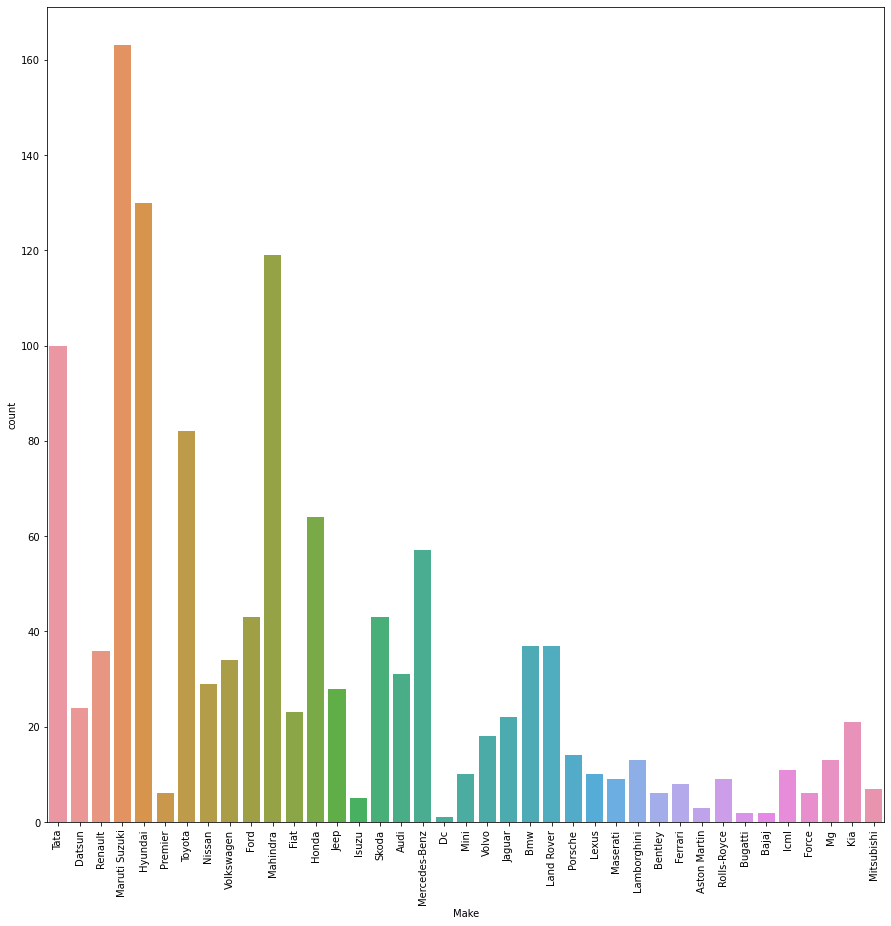

In [83]:
plt.figure(figsize=(15,15))
sns.countplot(df["Make"])
plt.xticks(rotation=90)

#### Insight:

Maruti suzuki has highest number of cars

Hyundai has second number of highest cars

DC has less number of cars 


#### Find the maximum,minimum and average car  price

In [84]:
df["Price"].agg(["min","max","mean"]).round(2)

min     2.364470e+05
max     2.121554e+08
mean    4.596538e+06
Name: Price, dtype: float64

#### Insight : 

Minimum price : 2.364470e+05 (i.e 2 lakhs 36 thousands)
    
Maximum Price : 2.121554e+08 (i.e 21 crores)
    
Average Price : 4.596538e+06  ( i.e 45 lakhs)

#### Find the car name  along with its features details and company name having price is minimum 

In [85]:
df[df["Price"]==df.Price.min()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No


#### Insight :
Cheapest car was Nano of company Tata with above features details  

#### Find the car along with its features details and company name having price is maximum

In [86]:
df[df["Price"]==df.Price.max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),...,Yes,No,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Insight :
Chiron of bugatti company was the most expensive car with above mentioned features 

#### Find the cars having price is greater than average price i.e 4.596538e+06

In [87]:
print(len(df[df["Price"]>=df["Price"].mean()]["Model"].unique()))
df[df["Price"]>=df["Price"].mean()]["Model"].unique()


107


array(['Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3', 'Discovery Sport', 'S90',
       'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercedes-Benz G-Class', 'A8 L', 'Granturismo', 'Quattroporte',
       'Lc 500H', 'Mercedes-Benz Maybach', 'Panamera', 'Lx 450D',
       'Mercedes-Benz S-Class Cabriolet', 'R8', 'Urus', 'Continental Gt',
       'Portofino', 'Bentayga', 'Db 11', '458 Speciale',
       'Rolls-Royce Ghost Series Ii', 'Rolls-Royce Wraith', 'Mulsanne',
       'Rolls-Royce Cullinan', 'Rolls-Royce Phantom Coupe', 'Chiron',
       'S60', '3-Series', 'Q5', 'Range Evoque', 'Mercedes-Benz E-Class',
       'Xc60', 'X4', 'Wrangler', 'Mercedes-Benz C-Class Cabriolet',
       'Z4 Roadster', 'Mercedes-Benz V-Class', 'Q7',
       'Range Evoque Convertible', 'Range Velar',
       'Mercedes-Benz E-Class

#### Insight :
107  cars having their price is greater than average price i.e 4.596538e+06 and above are the names of those cars

#### Find the company name, model and variant whose  price  is greater than average Car price in this data 

In [88]:
x=df[df["Price"]>=df["Price"].mean()][["Make","Model","Variant","Price"]]
x

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
...,...,...,...,...
1253,Porsche,Cayenne Coupe,Base,13151000.0
1254,Porsche,Cayenne Coupe,Turbo,19763000.0
1263,Bentley,Flying Spur,V8,34167064.0
1264,Bentley,Flying Spur,W12,39382083.0


#### How many numbers of  company's car having price which is greater than the average price of car's in this data

In [89]:
x1=x["Make"].value_counts().sort_values(ascending=False)
company_count=pd.DataFrame(x1)
company_count.reset_index()
#print(len(company_count["index"]))

,index,Make
0,Mercedes-Benz,42
1,Land Rover,37
2,Bmw,31
3,Audi,21
4,Jaguar,20
5,Porsche,14
6,Lamborghini,13
7,Lexus,10
8,Volvo,9
9,Rolls-Royce,9


#### Insight :
     above 20 companies' cars whose price is greater than average price
     
     

#### Find the average price of each above 20 companies 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Jaguar'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Bmw'),
  Text(3, 0, 'Land Rover'),
  Text(4, 0, 'Volvo'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Jeep'),
  Text(7, 0, 'Mercedes-Benz'),
  Text(8, 0, 'Porsche'),
  Text(9, 0, 'Toyota'),
  Text(10, 0, 'Lexus'),
  Text(11, 0, 'Maserati'),
  Text(12, 0, 'Lamborghini'),
  Text(13, 0, 'Bentley'),
  Text(14, 0, 'Ferrari'),
  Text(15, 0, 'Aston Martin'),
  Text(16, 0, 'Rolls-Royce'),
  Text(17, 0, 'Bugatti'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Mitsubishi')])

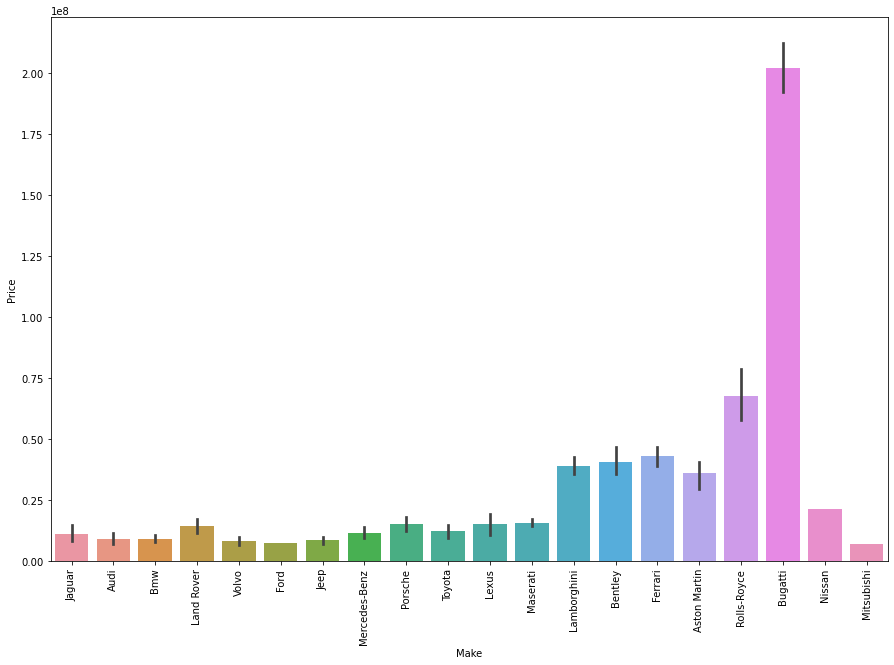

In [90]:
plt.figure(figsize=(15,10))
sns.barplot(x="Make",y="Price",data=x)
plt.xticks(rotation=90)

####  Insight :

Most Expensive company's car : Buggati

Least Expensive company's car : Mitsubishi

#### Find the min,max and average price of the cars based on their company 

In [91]:
df.groupby(["Make"])["Price"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Bugatti,192142937.0,212155397.0,2.021492e+08
Rolls-Royce,46709733.0,95000000.0,6.779633e+07
Ferrari,35000000.0,52000000.0,4.287250e+07
Bentley,33791059.0,52571294.0,4.056585e+07
Lamborghini,30000000.0,53210327.0,3.905392e+07
Aston Martin,29500000.0,40456503.0,3.626744e+07
Maserati,13387856.0,19865675.0,1.569689e+07
Porsche,6998000.0,22613000.0,1.534600e+07
Lexus,5695000.0,23290000.0,1.501530e+07


buyers can choose the companies car' based on their min, max and average price range

#### Visualization of companies with respect to  their average price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Tata'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Maruti Suzuki'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Premier'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Nissan'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'Fiat'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Jeep'),
  Text(14, 0, 'Isuzu'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Audi'),
  Text(17, 0, 'Mercedes-Benz'),
  Text(18, 0, 'Dc'),
  Text(19, 0, 'Mini'),
  Text(20, 0, 'Volvo'),
  Text(21, 0, 'Jaguar'),
  Text(22, 0, 'Bmw'),
  Text(23, 0, 'Land Rover'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Maserati'),
  Text(27, 0, 'Lamborghini'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Ferrari'),
  Text(30, 0, 'Aston Martin'),
  Text(31, 0, 'Rolls-Royce'),
  Te

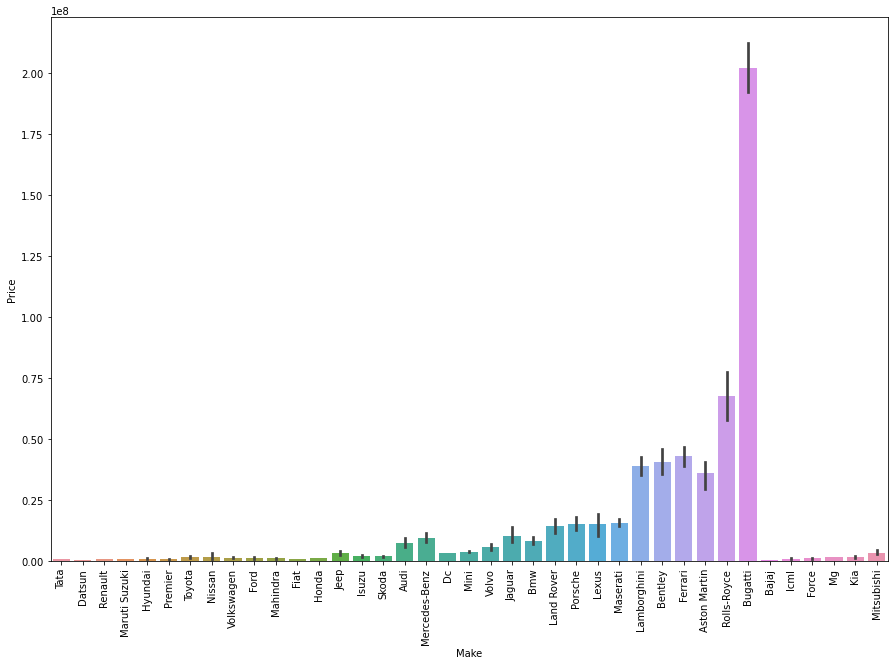

In [92]:
plt.figure(figsize=(15,10))
sns.barplot(x="Make",y="Price",data=df)
plt.xticks(rotation=90)

Insight :
    
#### Top 3 Expensive Company's cars average price :

1- Bugatti

2- Rolls- Royce

3- Ferari 

#### Cheapest company's car average price:

Datsun



#### Find the details of above top 3 expensive company's cars

In [93]:
df[((df["Make"]=="Bugatti")|(df["Make"]=="Ferari")|(df["Make"]=="Rolls-Royce"))]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
349,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,6.6,46709733.0,6593.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,No,Yes,Yes,Yes,Yes
350,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,Ewb,53247201.0,6592.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,No,Yes,Yes,Yes,Yes
351,12.0,2.0,4.0,2.0,Rolls-Royce,Rolls-Royce Wraith,Coupe,50025840.0,6592.0,AWD (All Wheel Drive),...,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes
353,12.0,5.0,5.0,2.0,Rolls-Royce,Rolls-Royce Cullinan,Suv,69500000.0,6750.0,AWD (All Wheel Drive),...,Yes,No,No,No,No,Yes,No,No,No,No
354,12.0,2.0,4.0,6.0,Rolls-Royce,Rolls-Royce Phantom Coupe,6.8 L,77312661.0,6749.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,No,Yes,Yes,Yes,Yes
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),...,Yes,No,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),...,Yes,No,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
879,12.0,2.0,4.0,8.0,Rolls-Royce,Rolls-Royce Dawn,Convertible,59216193.0,6598.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
880,12.0,2.0,4.0,6.0,Rolls-Royce,Rolls-Royce Drophead Coupe,Phantom,83755383.0,6749.0,RWD (Rear Wheel Drive),...,Yes,Yes,"Cup Holders, Audio Controls",Yes,Yes,Yes,Yes,Yes,Yes,Yes
1219,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Phantom,Sedan,95000000.0,6749.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,No,Yes,Yes,Yes,Yes


#### Now Find the cause why buggati ,rolls-royce , and Ferrari company's car are expensive what features they have provided so we compare these on the basis of some premium features based on domain knowledge

##### We will consider following premium features in order to differentiate  the above top 3 expensive cars with respect to price:

Premium feeatures which makes the difference of price in above premium cars(top 3 expensive cars)
- CYLINDER
- POWER
- TORQUE 
- TURBOCHARGER 


In [94]:
grp=df.groupby(["Make"])["Cylinders","Turbocharger","Torque","Power"]

C:\Users\acer\AppData\Local\Temp\ipykernel_220\23893045.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp=df.groupby(["Make"])["Cylinders","Turbocharger","Torque","Power"]


In [95]:
grp.get_group("Bugatti")

,Cylinders,Turbocharger,Torque,Power
355,16.0,Yes,160.0,147.0
356,16.0,Yes,147.0,160.0


In [96]:
grp.get_group("Ferrari")

,Cylinders,Turbocharger,Torque,Power
344,8.0,No,755.0,560.0
348,8.0,No,540.0,605.0
872,8.0,No,760.0,670.0
873,8.0,No,760.0,670.0
874,8.0,No,760.0,610.0
875,8.0,No,697.0,681.0
1058,12.0,No,718.0,789.0
1172,8.0,No,760.0,669.0


In [97]:
grp.get_group("Rolls-Royce")

,Cylinders,Turbocharger,Torque,Power
349,12.0,No,780.0,563.0
350,12.0,No,780.0,570.0
351,12.0,No,800.0,625.0
353,12.0,Yes,850.0,563.0
354,12.0,No,720.0,460.0
879,12.0,Yes,780.0,571.0
880,12.0,Yes,720.0,453.0
1219,12.0,No,720.0,460.0
1220,12.0,No,720.0,460.0


#### Insight : 

From above output we can see no.of cylinders in buggati is maximum and in rolls royce and ferrari none of the above premium feature clearly differentiate them so based on other features we can say their price is different since ferrari is top brand sport car and Rolls Royce is  the epitome of comfort so their type is totally different.
    

#### Find  CORRELATION OF FEATURES WITH PRICE

In [98]:
### Correlation of numeric columns in df with price 
df.corr()["Price"]

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.792404
Power                     0.650617
Torque                    0.538426
ARAI_Certified_Mileage   -0.033852
Ground_Clearance         -0.042823
Boot_Space                0.043585
Name: Price, dtype: float64

- Cylinders,Number_of_Airbags,displacement,power,torque and Boot_Space are positively  correlated with respect to price


- Doors, Seating_Capacity ,ARAI_Certified_Mileage and Ground_Clearance are negatively correlated with price


#### Cylinders,Displacement,Power and Torque are considered important features with respect to car price

#### Considering Following Features which are important with respect to price.
- Model
- Power
- Torque
- Displacement
- Cylinders
- Turbocharger
- Make
- Keyless_Entry
- Variant

save above  into x dataframe and analyze each feature with respect to price one by one 

In [99]:
x=df[["Model","Power","Torque","Displacement","Cylinders","Turbocharger","Make","Keyless_Entry","Variant","Price"]]
x

,Model,Power,Torque,Displacement,Cylinders,Turbocharger,Make,Keyless_Entry,Variant,Price
0,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,Remote,Xt,292667.0
1,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Xe,236447.0
2,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Emax Xm,296661.0
3,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,Remote,Xta,334768.0
4,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Xm,272223.0
...,...,...,...,...,...,...,...,...,...,...
1271,City,100.0,200.0,1498.0,4.0,Yes,Honda,Smart Key,Vx Mt Diesel,1302000.0
1272,City,100.0,200.0,1498.0,4.0,Yes,Honda,Smart Key,Zx Mt Diesel,1421000.0
1273,City,119.0,145.0,1497.0,4.0,No,Honda,Smart Key,Zx Cvt Petrol,1431000.0
1274,City,119.0,145.0,1497.0,4.0,No,Honda,Remote,V Cvt Petrol,1201000.0


### Taking turbo charger 

####  Find Average price of those cars which has turbocharger 

<AxesSubplot:xlabel='Turbocharger', ylabel='Price'>

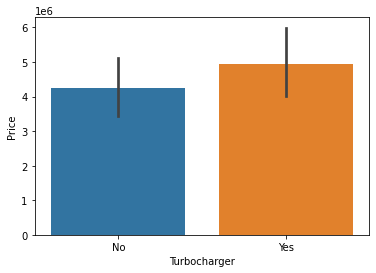

In [100]:

sns.barplot(x="Turbocharger",y="Price",data=x)

#### Insight : 

Average price of those cars having turbocharger is around Rs 5 lacs  and the outlier goes to 6
Average price of those cars having turbocharger is not present is  around Rs 4 lacs and the outlier goes to 5



In [101]:
x

,Model,Power,Torque,Displacement,Cylinders,Turbocharger,Make,Keyless_Entry,Variant,Price
0,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,Remote,Xt,292667.0
1,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Xe,236447.0
2,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Emax Xm,296661.0
3,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,Remote,Xta,334768.0
4,Nano Genx,38.0,51.0,624.0,2.0,No,Tata,No,Xm,272223.0
...,...,...,...,...,...,...,...,...,...,...
1271,City,100.0,200.0,1498.0,4.0,Yes,Honda,Smart Key,Vx Mt Diesel,1302000.0
1272,City,100.0,200.0,1498.0,4.0,Yes,Honda,Smart Key,Zx Mt Diesel,1421000.0
1273,City,119.0,145.0,1497.0,4.0,No,Honda,Smart Key,Zx Cvt Petrol,1431000.0
1274,City,119.0,145.0,1497.0,4.0,No,Honda,Remote,V Cvt Petrol,1201000.0


#### What is the Maximum price of the car having  turbocharger or not 

<BarContainer object of 1276 artists>

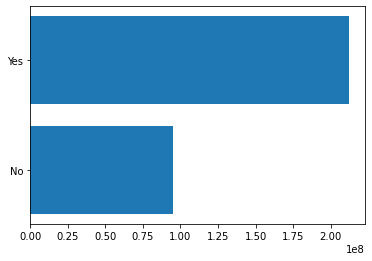

In [102]:
plt.barh(x["Turbocharger"],x["Price"])



#### Insight :

1- The car of around Rs 90000000  (9 crores) does not have turbo charger 

2- Maximum price of the car is 21 crore having turbocharger feature 
    
    

#### What is the maximum price of the car which provides turbocharger

In [103]:
max_turbo_y=x[x["Turbocharger"]=="Yes"]["Price"].max()
max_turbo_y

212155397.0

#### What is the minimum price of the car which provides turbocharger

In [104]:
min_turbo_y=x[x["Turbocharger"]=="Yes"]["Price"].min()
min_turbo_y

504990.0

#### What is the minimum price of the car which does not provide turbocharger

In [105]:
min_turbo_n=x[x["Turbocharger"]=="No"]["Price"].min()
min_turbo_n

236447.0

#### What is the maximum price of the car which does not provide turbocharger

In [106]:
max_turbo_n=x[x["Turbocharger"]=="No"]["Price"].max()
max_turbo_n

95000000.0

#### How many cars whose price is greater 95000000.0  which has turbocharger 

In [107]:
x[x["Price"]>max_turbo_n]["Turbocharger"].value_counts()

Yes    2
Name: Turbocharger, dtype: int64

In [108]:
x[x["Price"]>max_turbo_n][["Make","Model"]].value_counts()

Make     Model 
Bugatti  Chiron    2
dtype: int64

In [109]:
x[x["Price"]<=max_turbo_n]["Turbocharger"].value_counts()

Yes    656
No     618
Name: Turbocharger, dtype: int64

#### Find the companies which have some cars with Turbocharger feature

In [110]:
print(len(x[x["Turbocharger"]=="Yes"]["Make"].unique()))
x[x["Turbocharger"]=="Yes"]["Make"].unique()

35


array(['Premier', 'Toyota', 'Tata', 'Maruti Suzuki', 'Hyundai',
       'Volkswagen', 'Mahindra', 'Fiat', 'Jeep', 'Isuzu', 'Honda',
       'Skoda', 'Audi', 'Mercedes-Benz', 'Dc', 'Mini', 'Volvo', 'Jaguar',
       'Bmw', 'Land Rover', 'Porsche', 'Maserati', 'Bentley',
       'Rolls-Royce', 'Bugatti', 'Icml', 'Ford', 'Renault', 'Force', 'Mg',
       'Kia', 'Lamborghini', 'Nissan', 'Aston Martin', 'Mitsubishi'],
      dtype=object)

#### Find the companies which have some cars with no turbocharger feature

In [111]:
print(len(x[x["Turbocharger"]=="No"]["Make"].unique()))
x[x["Turbocharger"]=="No"]["Make"].unique()

31


array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Honda', 'Audi',
       'Mercedes-Benz', 'Mini', 'Jaguar', 'Bmw', 'Lexus', 'Maserati',
       'Porsche', 'Lamborghini', 'Ferrari', 'Aston Martin', 'Rolls-Royce',
       'Bajaj', 'Mahindra', 'Fiat', 'Skoda', 'Volvo', 'Land Rover', 'Mg',
       'Mitsubishi'], dtype=object)

Insight :
    there are some companies which provides turbocharger or not like tata, datsun, Maruti Suzuki etc

#### Company's distinction of cars based on turbocharger availability 

In [112]:
a=x.groupby(["Make"])["Turbocharger"].value_counts()
a


Make          Turbocharger
Aston Martin  Yes              2
              No               1
Audi          Yes             24
              No               7
Bajaj         No               2
                              ..
Toyota        Yes             34
Volkswagen    No              19
              Yes             15
Volvo         Yes             12
              No               6
Name: Turbocharger, Length: 66, dtype: int64

In [113]:
a=x.groupby(["Make"])["Turbocharger"].value_counts().sort_values(ascending=False)
a

Make           Turbocharger
Maruti Suzuki  No              122
Mahindra       Yes              81
Hyundai        No               77
Tata           Yes              64
Hyundai        Yes              53
                              ... 
Aston Martin   Yes               2
Mitsubishi     No                1
Lamborghini    Yes               1
Aston Martin   No                1
Dc             Yes               1
Name: Turbocharger, Length: 66, dtype: int64

#### Insight :

 - Mahindra has highest number of cars which has turbocharger feature
 
 - Maruti has highest numbers of cars which has no turbocharger feature

#### How turbocharger is impacting price 

In [114]:
## label encoding
x["Turbocharger"].replace({"Yes":1,"No":0},inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_220\2605298792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Turbocharger"].replace({"Yes":1,"No":0},inplace=True)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


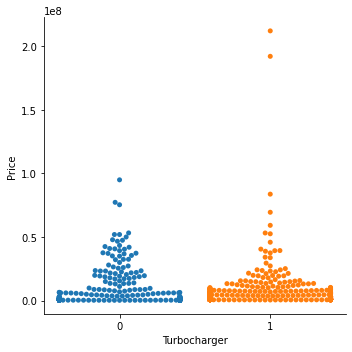

In [115]:
sns.catplot(x="Turbocharger",y="Price",data=x,kind="swarm")

##### Insight:

the plot of yes and no categories of turbocharger is almost same pattern so due to turbocharger  car's price is not impacting .

thus we can not rely on turbocharger to predict the price

#### Taking Keyless_Entry feature

In [116]:
## checking unqiue values
x["Keyless_Entry"].unique()

array(['Remote', 'No', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

#### Find the maximum price of cars having  key_less feature or not

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

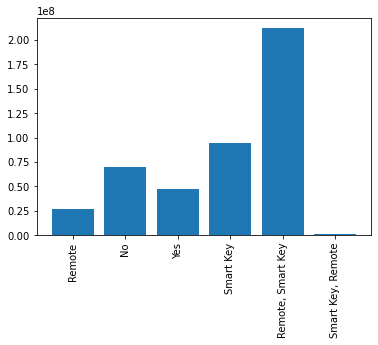

In [117]:
plt.bar(x["Keyless_Entry"],x["Price"])
plt.xticks(rotation=90)

#### in Below code we see the plots excluding 2 cars of buggatti

(array([0.e+00, 2.e+07, 4.e+07, 6.e+07, 8.e+07, 1.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

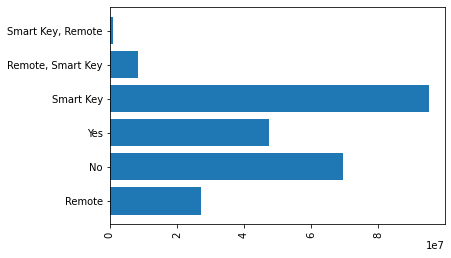

In [118]:
x1=x[x["Price"]<150000000]
plt.barh(x1["Keyless_Entry"],x1["Price"])
plt.xticks(rotation=90)

#### Insight :
    
- the cars having the smart key feature has maximum price 
- the cars having smart key, Remote feature has minimum price 

#### How price is related with keyless feature

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.4% of the points cann

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Remote'),
  Text(1, 0, 'No'),
  Text(2, 0, 'Yes'),
  Text(3, 0, 'Smart Key'),
  Text(4, 0, 'Remote, Smart Key'),
  Text(5, 0, 'Smart Key, Remote')])

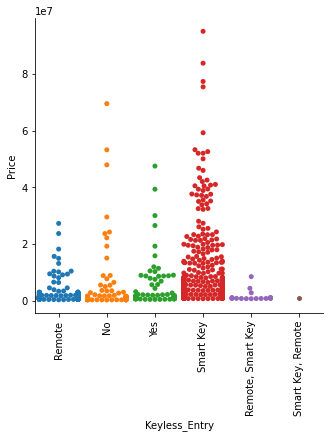

In [119]:
sns.catplot(x="Keyless_Entry",y="Price",data=x1,kind="swarm") ## taking x1 excluding bugatti
plt.xticks(rotation=90)

#### Insights:
    - The cars having smart key feature effects the price more
    

#### Find the companies cars which provides key less features

In [120]:
print(len(x[(x["Keyless_Entry"]=="Yes")| (x["Keyless_Entry"]=="Remote")|(x["Keyless_Entry"]=="Smart Key")|(x["Keyless_Entry"]=="Smart Key, Remote")|(x["Keyless_Entry"]=="Remote, Smart Key")]["Make"].unique()),"---","number of companies provides keyless features\n")
x[(x["Keyless_Entry"]=="Yes")| (x["Keyless_Entry"]=="Remote")|(x["Keyless_Entry"]=="Smart Key")|(x["Keyless_Entry"]=="Smart Key, Remote")|(x["Keyless_Entry"]=="Remote, Smart Key")]["Make"].unique()

36 --- number of companies provides keyless features



array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Fiat', 'Honda', 'Jeep',
       'Isuzu', 'Mahindra', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Mg', 'Kia', 'Mitsubishi'], dtype=object)

#### Insights:
    
    36  companies provides keyless feature in their cars and above are the names 

#### Company's distinction of cars based on keyless entry feature availability 

In [121]:
x.groupby(["Make"])["Keyless_Entry"].value_counts()

Make          Keyless_Entry
Aston Martin  Smart Key         2
              No                1
Audi          Smart Key        30
              Remote            1
Bajaj         No                2
                               ..
Volkswagen    No               10
              Yes               4
Volvo         Smart Key        12
              Remote            5
              Yes               1
Name: Keyless_Entry, Length: 107, dtype: int64

In [122]:
x.groupby(["Make"])["Keyless_Entry"].value_counts().sort_values(ascending=False)

Make           Keyless_Entry    
Maruti Suzuki  Remote               79
               No                   52
Mahindra       No                   51
Mercedes-Benz  Smart Key            49
Hyundai        Smart Key            41
                                    ..
Mini           Remote, Smart Key     1
Mahindra       Remote, Smart Key     1
Aston Martin   No                    1
Rolls-Royce    No                    1
Volvo          Yes                   1
Name: Keyless_Entry, Length: 107, dtype: int64

#### Find the maximum , minium and average price of the companies' cars which has keyless entry feature or not

In [123]:
x.groupby(["Make","Keyless_Entry"])["Price"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)


max          min          mean
Make          Keyless_Entry                                            
Bugatti       Remote, Smart Key  212155397.0  192142937.0  2.021492e+08
Rolls-Royce   No                  69500000.0   69500000.0  6.950000e+07
              Smart Key           95000000.0   46709733.0  6.758338e+07
Lamborghini   No                  53210327.0   47893943.0  5.055214e+07
Ferrari       Smart Key           52000000.0   35000000.0  4.287250e+07
...                                      ...          ...           ...
Renault       No                    863299.0     283290.0  4.652432e+05
Maruti Suzuki No                    762742.0     282778.0  4.592140e+05
              Yes                   481500.0     432500.0  4.570000e+05
Datsun        Yes                   437065.0     437065.0  4.370650e+05
Bajaj         No                    283000.0     263000.0  2.730000e+05

[107 rows x 3 columns]

In [124]:
kle=x[(x["Keyless_Entry"]=="Yes")| (x["Keyless_Entry"]=="Remote")|(x["Keyless_Entry"]=="Smart Key")|(x["Keyless_Entry"]=="Smart Key, Remote")|(x["Keyless_Entry"]=="Remote, Smart Key")]
kle ### having keyless feature

,Model,Power,Torque,Displacement,Cylinders,Turbocharger,Make,Keyless_Entry,Variant,Price
0,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,Remote,Xt,292667.0
3,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,Remote,Xta,334768.0
11,Redi-Go,68.0,91.0,999.0,3.0,0,Datsun,Yes,1.0 S Amt,437065.0
16,Kwid,68.0,91.0,999.0,3.0,0,Renault,Remote,Rxt 1.0,433290.0
17,Kwid,68.0,91.0,999.0,3.0,0,Renault,Remote,Climber 1.0 Mt,454490.0
...,...,...,...,...,...,...,...,...,...,...
1271,City,100.0,200.0,1498.0,4.0,1,Honda,Smart Key,Vx Mt Diesel,1302000.0
1272,City,100.0,200.0,1498.0,4.0,1,Honda,Smart Key,Zx Mt Diesel,1421000.0
1273,City,119.0,145.0,1497.0,4.0,0,Honda,Smart Key,Zx Cvt Petrol,1431000.0
1274,City,119.0,145.0,1497.0,4.0,0,Honda,Remote,V Cvt Petrol,1201000.0


#### Find the maximum , minium and average price of the companies' cars which has keyless entry feature 

In [125]:
kle.groupby(["Make","Keyless_Entry"])["Price"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,,max,min,mean
Make,Keyless_Entry,,,
Bugatti,"Remote, Smart Key",212155397.0,192142937.0,2.021492e+08
Rolls-Royce,Smart Key,95000000.0,46709733.0,6.758338e+07
Ferrari,Smart Key,52000000.0,35000000.0,4.287250e+07
Bentley,Smart Key,52571294.0,33791059.0,4.056585e+07
Aston Martin,Smart Key,40456503.0,38845823.0,3.965116e+07
...,...,...,...,...
Tata,Yes,787980.0,582287.0,6.870432e+05
Premier,Yes,739000.0,506000.0,6.295000e+05
Datsun,Remote,680153.0,574448.0,6.232513e+05


#### from above output Buyer can consider price range based on keyless entry feature requirement

#### Find the average price of cars based on key_less feature 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Remote'),
  Text(1, 0, 'No'),
  Text(2, 0, 'Yes'),
  Text(3, 0, 'Smart Key'),
  Text(4, 0, 'Remote, Smart Key'),
  Text(5, 0, 'Smart Key, Remote')])

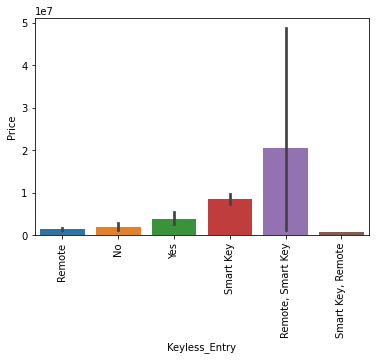

In [126]:
sns.barplot(x="Keyless_Entry",y="Price",data=x)
plt.xticks(rotation=90)

Insight : 

- The cars having Remote,Smart Key  has highest average price and it goes around 2 crores and outlier goes to 4.8 crores 

- The cars having remote keyless feature has less average price 

#### Taking numeric columns and see the relation with Price using scatter plot

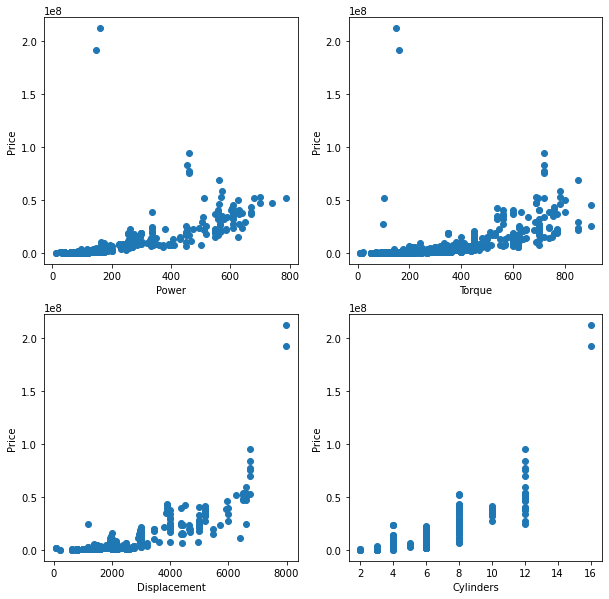

In [127]:
plt.figure(figsize=(10,10))
n=1
for i in ["Power","Torque","Displacement","Cylinders"]:
    if n<=4:
        plt.subplot(2,2,n)
        plt.scatter(x[i],x["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
    n=n+1

#### In order to see better visualization taking those cars having price is less than 15 crores 

In [128]:
x1=x[x["Price"]<15000000]
x1

,Model,Power,Torque,Displacement,Cylinders,Turbocharger,Make,Keyless_Entry,Variant,Price
0,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,Remote,Xt,292667.0
1,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,No,Xe,236447.0
2,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,No,Emax Xm,296661.0
3,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,Remote,Xta,334768.0
4,Nano Genx,38.0,51.0,624.0,2.0,0,Tata,No,Xm,272223.0
...,...,...,...,...,...,...,...,...,...,...
1271,City,100.0,200.0,1498.0,4.0,1,Honda,Smart Key,Vx Mt Diesel,1302000.0
1272,City,100.0,200.0,1498.0,4.0,1,Honda,Smart Key,Zx Mt Diesel,1421000.0
1273,City,119.0,145.0,1497.0,4.0,0,Honda,Smart Key,Zx Cvt Petrol,1431000.0
1274,City,119.0,145.0,1497.0,4.0,0,Honda,Remote,V Cvt Petrol,1201000.0


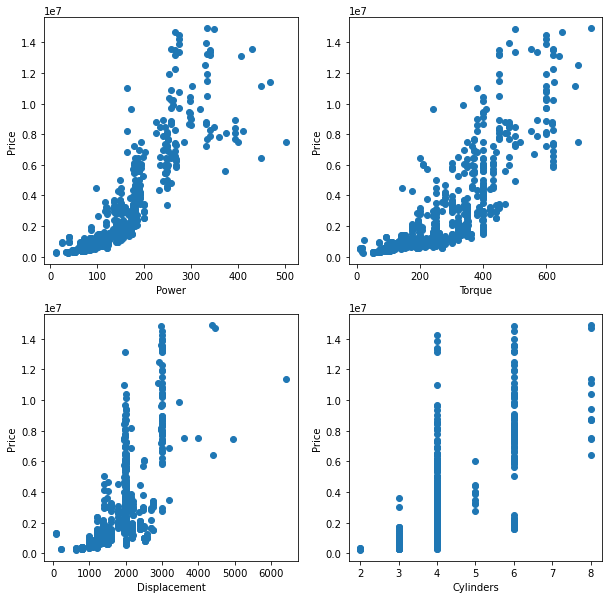

In [129]:
plt.figure(figsize=(10,10))
n=1
for i in ["Power","Torque","Displacement","Cylinders"]:
    if n<=4:
        plt.subplot(2,2,n)
        plt.scatter(x1[i],x1["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
    n=n+1

##### Insight :

- strong correlation of power and torque with respect to  price as price increases power and torque also increases

- Moderate correlation of displacement with price

-  there is positive strong correlation of cylinders till 4 cylinders with price 




{'whiskers': [<matplotlib.lines.Line2D at 0x1fd4682f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd4682f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd4682f040>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd4682fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd4683c040>],
 'means': []}

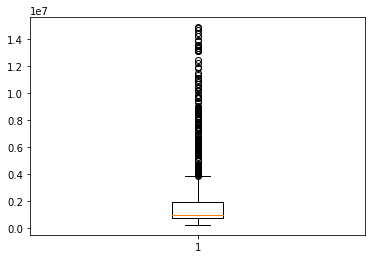

In [130]:
#### see outliers in  price  
plt.boxplot(x1["Price"])

In [131]:
np.percentile(x1["Price"],[0,10,25,50,75,90,95,99,99.99])

array([  236447.        ,   536859.        ,   719661.        ,
         999900.        ,  1973664.        ,  5930000.        ,
        8190000.        , 13365171.2       , 14903650.10199999])

#### A Buyer can choose top 3 cars based on following factors :


1) Safety 

2) Power

3) Torque

4) seating_capacity

5) Mileage

6)  Extra Features 

####  1. Safety : No of air bags


#### Find maximum,minimum and average air bags a company can give 

In [132]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,2.0,10.0,7.486486
Aston Martin,6.0,8.0,7.333333
Mercedes-Benz,2.0,10.0,7.192982
Bmw,4.0,10.0,7.054054
Porsche,4.0,10.0,7.000000
Volvo,6.0,8.0,6.611111
Bugatti,6.0,6.0,6.000000


##### Insight : 

According to safety point of view top 3 companies  : 

1- Lexus 

2- Audi 

3- land rover 

found to be good company cars which provides average  10.6, 7.58 , 7.48 number of air bags repectively.

#### 2- Power

#### Find the max,min and average power of each company gives

In [133]:
df.groupby(["Make"])["Power"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Ferrari,789.0,560.0,656.750000
Lamborghini,740.0,571.0,636.461538
Bentley,616.0,507.0,563.833333
Aston Martin,608.0,505.0,557.666667
Rolls-Royce,625.0,453.0,525.000000
Porsche,550.0,248.0,418.714286
Maserati,460.0,275.0,340.555556
Land Rover,567.0,179.0,318.540541
Jaguar,567.0,180.0,297.181818


#### Insight : 

According to Power point of view top 3 companies  : 

1- Ferrari

2- Lamborghini

3- Bentley 

found to be good company cars which provides average  power 656.75, 636.46 , 563.83 repectively.

#### 3- Torque

#### Find the max,min and average Torque of each company gives

In [134]:
df.groupby(["Make"])["Torque"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Rolls-Royce,850.0,720.0,763.333333
Ferrari,760.0,540.0,718.750000
Aston Martin,700.0,630.0,671.666667
Bentley,900.0,102.0,658.666667
Lamborghini,850.0,540.0,618.461538
Maserati,600.0,500.0,564.444444
Porsche,770.0,370.0,562.142857
Land Rover,740.0,340.0,526.891892
Bmw,850.0,200.0,480.810811


#### Insight : 

According to Torque point of view top 3 companies  : 

1- Rolls-Royce 

2- Ferrari 

3- Aston Martin 

found to be good company cars which provides average  torque 763.33, 718.75 , 671.66 repectively.

#### 4 - Seating capacity

#### Find the max,min and average seating capacity of each company gives

In [135]:
df.groupby(["Make"])["Seating_Capacity"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Icml,9.0,7.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,9.0,4.0,6.512605
Land Rover,7.0,4.0,6.135135
Isuzu,7.0,5.0,5.800000
Datsun,7.0,5.0,5.750000
Toyota,8.0,5.0,5.670732
Force,7.0,5.0,5.666667
Renault,8.0,5.0,5.666667


#### Insight : 

According to seating_capacity point of view top 3 companies  : 

1- Icml : 8 seater

2- Mitsubishi : 7 seater

3- Mahindra : 6 seater 


#### 5- Mileage

#### Find the max,min and average Mileage of each company gives

In [136]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Mercedes-Benz,1449.00,7.80,48.892982
Bajaj,35.00,23.00,29.000000
Maruti Suzuki,28.40,11.90,22.511043
Honda,27.40,14.40,21.362500
Datsun,25.10,20.10,21.341667
Mg,23.00,17.40,21.276923
Ford,26.10,10.90,21.144186
Tata,27.20,14.00,20.912000
Renault,25.10,13.80,20.594444


From above we can see The company Mercedes-Benz gives maximum mileage : 1449 which is not possible there might be typing mistake it might  be 14.49 

In [137]:
df["ARAI_Certified_Mileage"].unique()

array([  23.6 ,   23.  ,   21.9 ,   25.1 ,   22.5 ,   24.  ,   15.  ,
         20.1 ,   23.1 ,   20.3 ,   20.8 ,   20.5 ,   16.  ,   23.7 ,
         18.1 ,   23.5 ,   18.9 ,   19.4 ,   22.9 ,   17.5 ,   15.7 ,
         20.  ,   28.4 ,   22.  ,   18.6 ,   25.3 ,   20.4 ,   25.4 ,
         18.7 ,   17.2 ,   19.9 ,   24.4 ,   19.  ,   21.6 ,   21.7 ,
         26.1 ,   16.7 ,   17.7 ,   17.1 ,   23.8 ,   21.  ,   19.5 ,
         18.2 ,   27.3 ,   16.3 ,   13.8 ,   12.3 ,   12.  ,   17.  ,
         14.4 ,   18.3 ,   13.7 ,   19.2 ,   14.8 ,   17.9 ,   10.  ,
         16.9 ,   21.1 ,   14.5 ,   16.4 ,   11.  ,   13.1 ,   19.3 ,
         14.1 ,   18.5 ,   13.5 ,   13.3 ,   11.2 ,   13.  ,   12.8 ,
          8.61,    9.8 ,    7.4 ,   11.6 ,   11.1 ,   18.  ,   10.8 ,
         17.6 ,   11.8 ,    7.96,    7.8 ,   14.  ,    7.9 ,   10.6 ,
          6.71,    8.6 ,    9.  ,    8.77,   17.3 ,    7.29,   10.2 ,
          9.5 ,   22.4 ,   22.8 ,    5.95,   35.  ,   21.4 ,   19.7 ,
         25.2 ,   25

In [138]:
df[(df["ARAI_Certified_Mileage"]==1449.)]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,8.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz C-Class,C 43 Amg,7500000.0,3982.0,RWD (Rear Wheel Drive),...,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


the entry is found at index number 1036 so we correct it with 14.49:

In [139]:
df.loc[1036,"ARAI_Certified_Mileage"]

1449.0

In [140]:
df.loc[1036,"ARAI_Certified_Mileage"]=14.49

In [141]:
df.loc[1036,"ARAI_Certified_Mileage"]

14.49

that entry has been rectified now  compute the max,min average again

In [142]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Bajaj,35.00,23.00,29.000000
Mercedes-Benz,142.00,7.80,23.726140
Maruti Suzuki,28.40,11.90,22.511043
Honda,27.40,14.40,21.362500
Datsun,25.10,20.10,21.341667
Mg,23.00,17.40,21.276923
Ford,26.10,10.90,21.144186
Tata,27.20,14.00,20.912000
Renault,25.10,13.80,20.594444


#### Insight : 

According to ARAI_Certified_Mileage point of view top 3 companies  : 

1- Bajaj

2- Mercedes-Benz

3- Maruti Suzuki 

found to be good company cars which provides average  ARAI_Certified_Mileage 29, 23.7 , 22.5 repectively.

#### 6 - Extra features

In this we will show how the cars having extra features has highest price and vice versa  

In [143]:
### first find the unique values of features then select those where yes is present  
for i in df.columns:
    print(i,"------",df[i].unique())

Cylinders ------ [ 2.  3.  4.  5.  6.  8. 12. 10. 16.]
Doors ------ [5. 4. 2. 3.]
Seating_Capacity ------ [ 4.  5.  7.  2.  6.  9.  8. 16.]
Number_of_Airbags ------ [ 2.  1.  4.  6.  9.  8.  7. 10.  5.  3. 14.]
Make ------ ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model ------ ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr

In [144]:
### fetching extra features having yes is present considered as extra features a company provide apart from basic features 
features=[]
for i in df.columns:
    if "Yes" in df[i].unique(): 
        features.append(i)
features  

C:\Users\acer\AppData\Local\Temp\ipykernel_220\520143417.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "Yes" in df[i].unique():


['Keyless_Entry',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Third_Row_AC_Vents',
 'Ventilation_System',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Gear_Indicator',
 'ABS_(Anti-lock_Braking_System)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder',
 'Adjustable_Steering_Column',
 'Parking_Assistance',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)',
 'Navigation_System',
 'Second_Row_AC_Vents',
 'Rear_Center_Armrest',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'ASR_/_Traction_Control',
 'Cruise_Control']

In [145]:
#### Making datafarme of above features only 
df1 = df[features]
df1.head(2)

,Keyless_Entry,Odometer,Speedometer,Tachometer,Tripmeter,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Remote,Digital,Analog,Not on offer,Yes,Not Applicable,Manual Air conditioning with cooling and heating,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,Digital,Analog,Not on offer,Yes,Not Applicable,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [146]:
### add price and make columns in above df1
df1["Price"] = df["Price"]
df1["Make"] =  df["Make"]
df1.head(2)


C:\Users\acer\AppData\Local\Temp\ipykernel_220\2448748362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price"] = df["Price"]
C:\Users\acer\AppData\Local\Temp\ipykernel_220\2448748362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Make"] =  df["Make"]


,Keyless_Entry,Odometer,Speedometer,Tachometer,Tripmeter,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,...,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control,Price,Make
0,Remote,Digital,Analog,Not on offer,Yes,Not Applicable,Manual Air conditioning with cooling and heating,No,No,No,...,No,No,No,No,No,No,No,No,292667.0,Tata
1,No,Digital,Analog,Not on offer,Yes,Not Applicable,No,No,No,No,...,No,No,No,No,No,No,No,No,236447.0,Tata


In [147]:
#### agAin see the unique values 
for i in df1.columns:
    print(i,"----",df[i].unique())

Keyless_Entry ---- ['Remote' 'No' 'Yes' 'Smart Key' 'Remote, Smart Key' 'Smart Key, Remote']
Odometer ---- ['Digital' 'Analog' 'No' 'Digital, Analog' 'Yes']
Speedometer ---- ['Analog' 'Digital' 'Analog, Digital' 'Digital, Analog' 'No' 'Yes']
Tachometer ---- ['Not on offer' 'Digital' 'Analog' 'Analog, Digital' 'Digital, Analog'
 'Yes' 'No' 'Analog, Not on offer']
Tripmeter ---- ['Yes' '2' 'No' '1' '1, 2']
Third_Row_AC_Vents ---- ['Not Applicable' 'No' 'Yes']
Ventilation_System ---- ['Manual Air conditioning with cooling and heating' 'No'
 'Air Conditioning with cooling only' 'Yes' 'Heater'
 'Heater, Manual Air conditioning with cooling and heating'
 'Fully automatic climate control'
 'Heater, Fully automatic climate control'
 'Manual Air conditioning with cooling and heating, Fully automatic climate control'
 '2 Zone Climate Control' '3 Zone climate control'
 'Fully automatic climate control, 2 Zone Climate Control'
 '4 Zone climate control'
 'Fully automatic climate control, 3 Zone cli

#### taking those features having only two unqiue values yes or no   and treat them as extra features now

#### and add model also in it

In [148]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features

['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

In [149]:
df2=df[extra_features]
df2 ### df2 having extra features with company name and price

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,No,No,No,No,No,No,No,No,Tata,292667.0,No,No,No,No,No,No,No,No,Nano Genx
1,No,No,No,No,No,No,No,No,Tata,236447.0,No,No,No,No,No,No,No,No,Nano Genx
2,No,No,No,No,No,No,No,No,Tata,296661.0,No,No,No,No,Yes,Yes,No,No,Nano Genx
3,No,No,No,No,No,No,No,No,Tata,334768.0,No,No,No,Yes,No,No,No,No,Nano Genx
4,No,No,No,No,No,No,No,No,Tata,272223.0,No,No,No,No,No,No,No,No,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,No,No,Yes,No,No,Yes,Honda,1302000.0,No,Yes,Yes,No,Yes,No,Yes,Yes,City
1272,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,No,Yes,Yes,No,Yes,No,Yes,Yes,City
1273,Yes,Yes,No,No,No,No,Yes,Yes,Honda,1431000.0,No,Yes,Yes,No,Yes,No,Yes,Yes,City
1274,Yes,Yes,No,No,No,No,No,Yes,Honda,1201000.0,No,Yes,Yes,No,Yes,No,Yes,Yes,City


In [150]:
#### making copy of df2 and save it to df3 having extra features and setting model as index

In [151]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,No,No,No,No,No,No,No,No,Tata,292667.0,No,No,No,No,No,No,No,No
Nano Genx,No,No,No,No,No,No,No,No,Tata,236447.0,No,No,No,No,No,No,No,No
Nano Genx,No,No,No,No,No,No,No,No,Tata,296661.0,No,No,No,No,Yes,Yes,No,No
Nano Genx,No,No,No,No,No,No,No,No,Tata,334768.0,No,No,No,Yes,No,No,No,No
Nano Genx,No,No,No,No,No,No,No,No,Tata,272223.0,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,No,No,Yes,No,No,Yes,Honda,1302000.0,No,Yes,Yes,No,Yes,No,Yes,Yes
City,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,No,Yes,Yes,No,Yes,No,Yes,Yes
City,Yes,Yes,No,No,No,No,Yes,Yes,Honda,1431000.0,No,Yes,Yes,No,Yes,No,Yes,Yes


In [152]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [153]:
df3.values

array([['No', 'No', 'No', ..., 'No', 'No', 'No'],
       ['No', 'No', 'No', ..., 'No', 'No', 'No'],
       ['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [154]:
for i,j in zip(df3.index,df3.values): ## zipping of model name with their corresponding columns values
    print(i,"***",j)

Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 292667.0 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 236447.0 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 296661.0 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No']
Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 334768.0 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No']
Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 272223.0 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
Nano Genx *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Tata' 314815.0 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No']
Redi-Go *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Datsun' 279650.0 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No']
Redi-Go *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Datsun' 351832.0 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes']
Redi-Go *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Datsun' 333419.0 'No' 'No' 'No'
 'No

Kuv100 Nxt *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 550155.0 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']
Kuv100 Nxt *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 559741.0 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']
Kuv100 Nxt *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Mahindra' 524312.0 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']
Kuv100 Nxt *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Mahindra' 542913.0 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']
Swift *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Maruti Suzuki' 519000.0 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']
Swift *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Maruti Suzuki' 619000.0 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes']
Swift *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Maruti Suzuki' 666000.0 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes']
Swift *** ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Maruti Suzuki' 678000.0 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Swift *** [

Tuv300 *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 854328.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'No']
Tuv300 *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 914328.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Tuv300 *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 976592.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Tuv300 *** ['Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 999614.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Tuv300 *** ['Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 1031943.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Tuv300 *** ['Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 1022930.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
Tuv300 *** ['Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Mahindra' 1055259.0 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
S-Cross *** ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Maruti Suzuki' 880689.0 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No']
S-Cross *** ['No' 'No' 'No' 'No' 'Yes

In [155]:
#### Count the number of yes features a model has along with its price

In [156]:
for i,j in zip(df3.index,df3.values):
    c = 0
    l = []
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print(i,c,j[9]) ## or j[len(j)-9]

Nano Genx 0 292667.0
Nano Genx 0 236447.0
Nano Genx 2 296661.0
Nano Genx 1 334768.0
Nano Genx 0 272223.0
Nano Genx 1 314815.0
Redi-Go 1 279650.0
Redi-Go 1 351832.0
Redi-Go 0 333419.0
Redi-Go 0 362000.0
Redi-Go 0 390000.0
Redi-Go 1 437065.0
Kwid 4 353290.0
Kwid 4 283290.0
Kwid 5 383290.0
Kwid 6 413290.0
Kwid 5 433290.0
Kwid 5 454490.0
Kwid 8 463290.0
Kwid 7 484490.0
Kwid 5 440990.0
Kwid 5 470990.0
Kwid 5 462190.0
Kwid 7 492190.0
Eeco 3 352136.0
Eeco 3 380573.0
Eeco 1 392967.0
Eeco 3 466057.0
Eeco 3 425255.0
Alto K10 3 377588.0
Alto K10 5 394036.0
Alto K10 3 360843.0
Alto K10 3 407238.0
Alto K10 1 439777.0
Alto K10 4 438559.0
Go 5 374990.0
Go 7 468229.0
Go 7 502492.0
Go 5 499990.0
Go 5 469990.0
Go 7 528464.0
Go 7 553015.0
Go 7 594464.0
Go 7 618015.0
Celerio Tour 3 422444.0
Celerio Tour 2 480670.0
Santro 5 429990.0
Santro 5 503990.0
Santro 6 547990.0
Santro 6 530990.0
Santro 7 512990.0
Santro 8 578990.0
Santro 7 570990.0
Santro 7 556490.0
Tiago 6 460000.0
Tiago 9 520000.0
Tiago 9 570000.0

Ecosport 8 921000.0
Ecosport 9 999900.0
Ecosport 15 1090000.0
Ecosport 15 999900.0
Ecosport 10 1145000.0
Ecosport 15 999900.0
Ecosport 15 1090000.0
Duster 5 799990.0
Duster 6 919990.0
Duster 9 999990.0
Duster 5 929990.0
Duster 8 999990.0
Duster 9 1119990.0
Duster 9 1209990.0
Duster 11 1249990.0
Duster 9 1249990.0
Verna 9 999900.0
Verna 10 1172544.0
Verna 12 1301881.0
Verna 11 1172999.0
Verna 8 1328545.0
Verna 8 1287999.0
Verna 9 933182.0
Verna 7 817867.0
Verna 11 1178894.0
Verna 8 1162875.0
Verna 8 1407871.0
Verna 7 942867.0
Verna 9 999900.0
Xuv300 6 830127.0
Xuv300 7 915128.0
Xuv300 13 1060129.0
Xuv300 13 1184129.0
Xuv300 6 869131.0
Xuv300 9 950131.0
Xuv300 13 1095129.0
Xuv300 14 1214130.0
Xuv300 13 1149800.0
Xuv300 14 1269131.0
Xuv300 9 999000.0
Lodgy 4 863299.0
Lodgy 4 964199.0
Lodgy 7 1211599.0
Lodgy 7 1211599.0
Lodgy 6 1053899.0
Lodgy 9 1130099.0
Lodgy 5 964199.0
Vento 3 876500.0
Vento 12 999900.0
Vento 10 999900.0
Vento 11 1197500.0
Vento 11 1449500.0
Vento 4 958500.0
Vento 11 99

Vantage 4 29500000.0
Rapide 15 38845823.0
812 Superfast 13 52000000.0
Alto 800 Tour 1 354235.0
Alto 800 Tour 1 356559.0
Grand I10 Nios 7 675090.0
Grand I10 Nios 4 504990.0
Grand I10 Nios 7 589610.0
Grand I10 Nios 7 642610.0
Grand I10 Nios 7 643350.0
Grand I10 Nios 8 703350.0
Grand I10 Nios 8 673350.0
Grand I10 Nios 9 718950.0
Grand I10 Nios 8 790350.0
Grand I10 Nios 10 804450.0
Xcent 8 643769.0
Xcent 7 733734.0
Xcent 9 705546.0
Xcent 9 782346.0
Xcent 9 742033.0
Xcent 5 581078.0
Xcent 10 798558.0
Xcent 7 875358.0
Xcent 6 673261.0
Micra 5 662880.0
Micra 7 781686.0
Micra 5 743504.0
Micra 6 812964.0
Bolero 2 942263.0
Bolero 2 917055.0
Bolero 2 860720.0
Bolero 2 815883.0
Bolero 2 773678.0
Ciaz 12 1102689.0
Ciaz 6 919689.0
Ciaz 7 980689.0
Ciaz 9 1062689.0
Ciaz 6 819689.0
Ciaz 7 881689.0
Ciaz 8 958689.0
Ciaz 10 997689.0
Ciaz 9 980689.0
Ciaz 9 1058688.0
Ciaz 12 1098689.0
Ciaz 11 1138189.0
Ciaz 7 997689.0
Ciaz 10 1109189.0
Rapid 5 998599.0
Rapid 5 1006139.0
Rapid 4 881916.0
Rapid 7 1129599.0
Ra

#### Insight :
From above output we can see price increases with increase number of features 
and those models which have different price on same number of features where other factors like torque , power matters  like nano genx cars' etc.

#### Step 4 : Data Preparation



In [157]:
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),...,No,No,No,No,No,No,No,No,No,No


In [158]:
df.shape

(1276, 49)

#### Check how many columns are of object type

In [159]:
df.select_dtypes("object").shape

(1276, 38)

In [160]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     

##### 4.1- Encoding 

####  Do label encoding of those columns which has two unique values as  yes or no values 

In [161]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)', 'Cooled_Glove_Box',
       'Turbocharger', 'Rain_Sensing_Wipers', 'Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)', 'Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Key_Off_Reminder',
       'USB_Compatibility']
for i in l:
    df[i].replace({"Yes":1,"No":0},inplace=True)
df.head(3)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,...,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),...,0,0,No,0,0,0,0,0,No,0
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),...,0,0,No,0,0,0,0,0,No,0
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),...,0,0,No,0,0,0,0,0,No,0


### Now check its unique values 

In [162]:
for i in df.select_dtypes("object"):
    print(i,"::",df[i].nunique())

Make :: 39
Model :: 263
Variant :: 1064
Drivetrain :: 4
Emission_Norm :: 4
Keyless_Entry :: 6
Odometer :: 5
Speedometer :: 6
Tachometer :: 8
Tripmeter :: 5
Fuel_Type :: 6
Front_Suspension :: 140
Rear_Suspension :: 173
Audiosystem :: 8
Third_Row_AC_Vents :: 3
Ventilation_System :: 16
Gear_Shift_Reminder :: 2
Adjustable_Steering_Column :: 5
Parking_Assistance :: 11
Seat_Height_Adjustment :: 4
Rear_Center_Armrest :: 6
ASR_/_Traction_Control :: 2


In [163]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     

In [164]:
df.select_dtypes("object").shape 

(1276, 22)

now we have 22 columns are of object type

In [165]:
dff=df.copy()

In [166]:
dff.shape

(1276, 49)

In [167]:
dff.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     

#### one hot encoding of above object dtypes columns 

In [168]:
### check the shape of those columns of object type
dff.select_dtypes("object").shape

(1276, 22)

In [169]:
dff_obj=dff.select_dtypes("object")
dff_obj.head()

,Make,Model,Variant,Drivetrain,Emission_Norm,Keyless_Entry,Odometer,Speedometer,Tachometer,Tripmeter,...,Rear_Suspension,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Seat_Height_Adjustment,Rear_Center_Armrest,ASR_/_Traction_Control
0,Tata,Nano Genx,Xt,RWD (Rear Wheel Drive),BS IV,Remote,Digital,Analog,Not on offer,Yes,...,"Independent, Semi Trailing arm with coil sprin...",CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,No,No,No,Manual Adjustment,No,No
1,Tata,Nano Genx,Xe,RWD (Rear Wheel Drive),BS IV,No,Digital,Analog,Not on offer,Yes,...,"Independent, Semi Trailing arm with coil sprin...",Not on offer,Not Applicable,No,No,No,No,Manual Adjustment,No,No
2,Tata,Nano Genx,Emax Xm,RWD (Rear Wheel Drive),BS IV,No,Digital,Analog,Not on offer,Yes,...,"Independent, Semi Trailing arm with coil sprin...",Not on offer,Not Applicable,Air Conditioning with cooling only,No,No,No,Manual Adjustment,No,No
3,Tata,Nano Genx,Xta,RWD (Rear Wheel Drive),BS IV,Remote,Digital,Analog,Not on offer,Yes,...,"Independent, Semi Trailing arm with coil sprin...",CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,No,No,No,Manual Adjustment,No,No
4,Tata,Nano Genx,Xm,RWD (Rear Wheel Drive),BS IV,No,Digital,Analog,Not on offer,Yes,...,"Independent, Semi Trailing arm with coil sprin...",Not on offer,Not Applicable,Air Conditioning with cooling only,No,No,No,Manual Adjustment,No,No


In [170]:
col_list=[]  ### taking column names in list 
for i in dff_obj:
    col_list.append(i)
print(col_list)

['Make', 'Model', 'Variant', 'Drivetrain', 'Emission_Norm', 'Keyless_Entry', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type', 'Front_Suspension', 'Rear_Suspension', 'Audiosystem', 'Third_Row_AC_Vents', 'Ventilation_System', 'Gear_Shift_Reminder', 'Adjustable_Steering_Column', 'Parking_Assistance', 'Seat_Height_Adjustment', 'Rear_Center_Armrest', 'ASR_/_Traction_Control']


In [171]:
dff1_obj=pd.get_dummies(dff_obj, prefix=col_list,drop_first=True) ### one hot encoding of 22 columns
dff1_obj

,Make_Audi,Make_Bajaj,Make_Bentley,Make_Bmw,Make_Bugatti,Make_Datsun,Make_Dc,Make_Ferrari,Make_Fiat,Make_Force,...,Parking_Assistance_Yes,Seat_Height_Adjustment_Electric Adjustment with Memory,Seat_Height_Adjustment_Manual Adjustment,Seat_Height_Adjustment_Semi Automatic Adjustment,"Rear_Center_Armrest_Audio Controls, Cup Holders",Rear_Center_Armrest_Cup Holders,"Rear_Center_Armrest_Cup Holders, Audio Controls",Rear_Center_Armrest_No,Rear_Center_Armrest_Yes,ASR_/_Traction_Control_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1274,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [172]:
dff_final=pd.concat([dff.select_dtypes(numeric),dff1_obj],axis=1)

In [173]:
dff_final.shape

(1276, 1785)

#### dff_final contains 1276 rows and 1785 columns

In [174]:
### viewing  top 2 rows of dff_final

dff_final.head(2)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Price,Displacement,Power,Torque,ARAI_Certified_Mileage,Ground_Clearance,...,Parking_Assistance_Yes,Seat_Height_Adjustment_Electric Adjustment with Memory,Seat_Height_Adjustment_Manual Adjustment,Seat_Height_Adjustment_Semi Automatic Adjustment,"Rear_Center_Armrest_Audio Controls, Cup Holders",Rear_Center_Armrest_Cup Holders,"Rear_Center_Armrest_Cup Holders, Audio Controls",Rear_Center_Armrest_No,Rear_Center_Armrest_Yes,ASR_/_Traction_Control_Yes
0,2.0,5.0,4.0,2.0,292667.0,624.0,38.0,51.0,23.6,180.0,...,0,0,1,0,0,0,0,1,0,0
1,2.0,5.0,4.0,2.0,236447.0,624.0,38.0,51.0,23.6,180.0,...,0,0,1,0,0,0,0,1,0,0


In [175]:
### checking the dtypes of all columns
dff_final.dtypes

Cylinders                                          float64
Doors                                              float64
Seating_Capacity                                   float64
Number_of_Airbags                                  float64
Price                                              float64
                                                    ...   
Rear_Center_Armrest_Cup Holders                      uint8
Rear_Center_Armrest_Cup Holders, Audio Controls      uint8
Rear_Center_Armrest_No                               uint8
Rear_Center_Armrest_Yes                              uint8
ASR_/_Traction_Control_Yes                           uint8
Length: 1785, dtype: object

In [176]:
## since columns size are too largeto so to verify its columns' types whether they are in  numeric or not.
c=0
for i in dff_final:
    if dff_final[i].dtypes=="object":
        print(i)
    else :
        c=c+1
print(c)

1785


it means 1785 columns are numeric

####  Step 5 :  Data Modelling and Evaluation

In [177]:
dff_final.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Price,Displacement,Power,Torque,ARAI_Certified_Mileage,Ground_Clearance,...,Parking_Assistance_Yes,Seat_Height_Adjustment_Electric Adjustment with Memory,Seat_Height_Adjustment_Manual Adjustment,Seat_Height_Adjustment_Semi Automatic Adjustment,"Rear_Center_Armrest_Audio Controls, Cup Holders",Rear_Center_Armrest_Cup Holders,"Rear_Center_Armrest_Cup Holders, Audio Controls",Rear_Center_Armrest_No,Rear_Center_Armrest_Yes,ASR_/_Traction_Control_Yes
0,2.0,5.0,4.0,2.0,292667.0,624.0,38.0,51.0,23.6,180.0,...,0,0,1,0,0,0,0,1,0,0
1,2.0,5.0,4.0,2.0,236447.0,624.0,38.0,51.0,23.6,180.0,...,0,0,1,0,0,0,0,1,0,0
2,2.0,4.0,4.0,2.0,296661.0,624.0,38.0,51.0,23.0,180.0,...,0,0,1,0,0,0,0,1,0,0
3,2.0,5.0,4.0,2.0,334768.0,624.0,38.0,51.0,21.9,180.0,...,0,0,1,0,0,0,0,1,0,0
4,2.0,5.0,4.0,2.0,272223.0,624.0,38.0,51.0,23.6,180.0,...,0,0,1,0,0,0,0,1,0,0


#### Dividing the dff_final into features as X and Target as y

In [178]:
X=dff_final.drop(columns=["Price"])
y=dff_final.Price

In [179]:
print(X.shape)
print(y.shape)

(1276, 1784)
(1276,)


#### Splitting the data into training and test data as 10% of data into test data and 90% of data into train data since we take 90% of data as train because data size is not large

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=2)

#### Checking the shape of train and test data

In [181]:
print("training data shape")
print(X_train.shape)
print(y_train.shape)
print("test data shape")
print(X_test.shape)
print(y_test.shape)

training data shape
(1148, 1784)
(1148,)
test data shape
(128, 1784)
(128,)


Since number of features is high i.e 1748 so we are implementing SelectKBest technique as feature selection 

#### Feature Selection: SelectKBest 


In [182]:
print("Feature data dimension: ", X_train.shape)

select = SelectKBest(score_func=f_regression, k=20) ## k denotes top 20 features and f_regression is used as score_func for regression problem 
z = select.fit_transform(X_train,y_train)  ### getting array of those 20 features  having corresponding values 
print("After selecting best 20 features:", z.shape) ## shape of new df as z
#print(z)

Feature data dimension:  (1148, 1784)
After selecting best 20 features: (1148, 20)


C:\Users\acer\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


#### see the scores of all features in descending order

In [183]:
score_features=pd.DataFrame({"features":X_train.columns,"scores":select.scores_})
score_features.sort_values(by="scores",ascending=False)

,features,scores
0,Cylinders,2619.423914
4,Displacement,2389.488245
5,Power,1310.768522
6,Torque,679.647029
30,Make_Bugatti,415.076815
...,...,...
1629,Rear_Suspension_Horizontal dampers and springs,NaN
1636,Rear_Suspension_Independent rear suspensions w...,NaN
1648,Rear_Suspension_Leaf spring with Double action...,NaN
1680,Rear_Suspension_Runflat,NaN


#### to see the names of top 20 features that have been filtered out

In [184]:
filter = select.get_support()
features = np.array(X_train.columns)
 
print("All features:\n")
print(features,"\n\n")
#print("--",filter) 
print("Selected best 20 features ---------:\n")
print(features[filter])

All features:

['Cylinders' 'Doors' 'Seating_Capacity' ... 'Rear_Center_Armrest_No'
 'Rear_Center_Armrest_Yes' 'ASR_/_Traction_Control_Yes'] 


Selected best 20 features ---------:

['Cylinders' 'Doors' 'Number_of_Airbags' 'Displacement' 'Power' 'Torque'
 'Rain_Sensing_Wipers' 'Automatic_Headlamps' 'Cruise_Control'
 'Make_Bugatti' 'Make_Rolls-Royce' 'Model_Chiron' 'Variant_W16'
 'Drivetrain_AWD (All Wheel Drive)' 'Drivetrain_FWD (Front Wheel Drive)'
 'Front_Suspension_Independent Double Wishbone with Air Springs'
 'Rear_Suspension_Independent Multi-Link with Air Springs'
 'Seat_Height_Adjustment_Electric Adjustment with Memory'
 'Seat_Height_Adjustment_Manual Adjustment' 'ASR_/_Traction_Control_Yes']


In [185]:
## fetching the scores of top 20 features 
sf=score_features.sort_values(by="scores",ascending=False)[0:20]
sf

,features,scores
0,Cylinders,2619.423914
4,Displacement,2389.488245
5,Power,1310.768522
6,Torque,679.647029
30,Make_Bugatti,415.076815
1270,Variant_W16,415.076815
110,Model_Chiron,415.076815
1,Doors,357.748692
58,Make_Rolls-Royce,355.339178
1390,Drivetrain_FWD (Front Wheel Drive),285.765512


In [186]:
### checking unique values of top 20 features
sf["features"].unique()

array(['Cylinders', 'Displacement', 'Power', 'Torque', 'Make_Bugatti',
       'Variant_W16', 'Model_Chiron', 'Doors', 'Make_Rolls-Royce',
       'Drivetrain_FWD (Front Wheel Drive)',
       'Seat_Height_Adjustment_Manual Adjustment',
       'ASR_/_Traction_Control_Yes',
       'Front_Suspension_Independent Double Wishbone with Air Springs',
       'Rear_Suspension_Independent Multi-Link with Air Springs',
       'Rain_Sensing_Wipers',
       'Seat_Height_Adjustment_Electric Adjustment with Memory',
       'Automatic_Headlamps', 'Drivetrain_AWD (All Wheel Drive)',
       'Cruise_Control', 'Number_of_Airbags'], dtype=object)

#### Now taking the data of above these 20 features  in dff_final2

In [187]:

dff_final2=dff_final[sf["features"].unique()]
dff_final2

,Cylinders,Displacement,Power,Torque,Make_Bugatti,Variant_W16,Model_Chiron,Doors,Make_Rolls-Royce,Drivetrain_FWD (Front Wheel Drive),Seat_Height_Adjustment_Manual Adjustment,ASR_/_Traction_Control_Yes,Front_Suspension_Independent Double Wishbone with Air Springs,Rear_Suspension_Independent Multi-Link with Air Springs,Rain_Sensing_Wipers,Seat_Height_Adjustment_Electric Adjustment with Memory,Automatic_Headlamps,Drivetrain_AWD (All Wheel Drive),Cruise_Control,Number_of_Airbags
0,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
1,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2.0,624.0,38.0,51.0,0,0,0,4.0,0,0,1,0,0,0,0,0,0,0,0,2.0
3,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
4,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1498.0,100.0,200.0,0,0,0,4.0,0,1,1,0,0,0,0,0,0,0,1,2.0
1272,4.0,1498.0,100.0,200.0,0,0,0,4.0,0,1,1,0,0,0,1,0,1,0,1,6.0
1273,4.0,1497.0,119.0,145.0,0,0,0,4.0,0,1,1,0,0,0,0,0,1,0,1,6.0
1274,4.0,1497.0,119.0,145.0,0,0,0,4.0,0,1,1,0,0,0,0,0,0,0,1,2.0


In [188]:
X=dff_final2  ## taking X as  20 features 
y=dff_final["Price"] ### y as target i.e Price

### Do scaling of Features only i.e X

In [189]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)  # X_scaled contains scaled features data 

In [190]:
X_scaled.shape

(1276, 20)

In [191]:
### importing library for computing vif


In [192]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,6.346841,Cylinders
1,8.597775,Displacement
2,10.571591,Power
3,5.985389,Torque
4,inf,Make_Bugatti
5,1.998582,Variant_W16
6,inf,Model_Chiron
7,1.557326,Doors
8,3.387197,Make_Rolls-Royce
9,2.161269,Drivetrain_FWD (Front Wheel Drive)


In [193]:
####  we are taking those features with vif<=11 in order to exclude those features having vif is inf
vif[vif["vif"]>11]["Features"].unique()

array(['Make_Bugatti', 'Model_Chiron',
       'Front_Suspension_Independent Double Wishbone with Air Springs',
       'Rear_Suspension_Independent Multi-Link with Air Springs'],
      dtype=object)

In [194]:
X

,Cylinders,Displacement,Power,Torque,Make_Bugatti,Variant_W16,Model_Chiron,Doors,Make_Rolls-Royce,Drivetrain_FWD (Front Wheel Drive),Seat_Height_Adjustment_Manual Adjustment,ASR_/_Traction_Control_Yes,Front_Suspension_Independent Double Wishbone with Air Springs,Rear_Suspension_Independent Multi-Link with Air Springs,Rain_Sensing_Wipers,Seat_Height_Adjustment_Electric Adjustment with Memory,Automatic_Headlamps,Drivetrain_AWD (All Wheel Drive),Cruise_Control,Number_of_Airbags
0,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
1,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2.0,624.0,38.0,51.0,0,0,0,4.0,0,0,1,0,0,0,0,0,0,0,0,2.0
3,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
4,2.0,624.0,38.0,51.0,0,0,0,5.0,0,0,1,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1498.0,100.0,200.0,0,0,0,4.0,0,1,1,0,0,0,0,0,0,0,1,2.0
1272,4.0,1498.0,100.0,200.0,0,0,0,4.0,0,1,1,0,0,0,1,0,1,0,1,6.0
1273,4.0,1497.0,119.0,145.0,0,0,0,4.0,0,1,1,0,0,0,0,0,1,0,1,6.0
1274,4.0,1497.0,119.0,145.0,0,0,0,4.0,0,1,1,0,0,0,0,0,0,0,1,2.0


In [195]:
### dropping these above features from X 
X.drop(columns=['Make_Bugatti', 'Model_Chiron',
       'Front_Suspension_Independent Double Wishbone with Air Springs',
       'Rear_Suspension_Independent Multi-Link with Air Springs'],inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_220\238034756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Make_Bugatti', 'Model_Chiron',


In [196]:
X.shape ### now X contains 16 columns 

(1276, 16)

In [197]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) ## X_scaled contains 16 scaled features

In [198]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,5.746108,Cylinders
1,7.910977,Displacement
2,9.132983,Power
3,5.868587,Torque
4,1.273680,Variant_W16
5,1.550040,Doors
6,1.390902,Make_Rolls-Royce
7,2.153160,Drivetrain_FWD (Front Wheel Drive)
8,4.262712,Seat_Height_Adjustment_Manual Adjustment
9,4.037322,ASR_/_Traction_Control_Yes


In [199]:
y.shape

(1276,)

#### Step 5: Model building and evaluation

#### Splitting the data into training and test data as 10% of data into test data and 90% of data into train data since we take 90% of data as train because data size is not large

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.10,random_state=123)

In [201]:
r_square_metric=[]

#### We will compare different Supervised learning models and compare the results based on r square metric and choose the one which is more efficient 

### 1. Linear Regression

#### Fitting linear Regression Model

In [202]:
lr=LinearRegression() 
lr.fit(X_train,y_train)

LinearRegression()

In [203]:
print(lr.intercept_) ### Fetching coefficients values
print(lr.coef_)

4644492.212063266
[ 5400484.59721161  6195705.10886256  -224192.6117475  -2945794.73730319
  3015995.43705036  -551027.80104921  1327721.93753003  -317809.82348947
   518032.9329851    386139.04129001   211460.0398283    578746.5606911
   257964.35816262   -96972.96474114    68880.17407851  -662691.08095326]


#### Linear Regression Model evaluation

In [204]:
y_pred1=lr.predict(X_test)
r=r2_score(y_test,y_pred1)
r_square_metric.append(r)

###  2. KNN

#### KNN Model Fitting

In [205]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

#### KNN Model Evaluation

In [206]:
y_pred8 = knn.predict(X_test)
r=r2_score(y_test,y_pred8)
r_square_metric.append(r)

In [207]:
X  ### taking X features  with out scaling

,Cylinders,Displacement,Power,Torque,Variant_W16,Doors,Make_Rolls-Royce,Drivetrain_FWD (Front Wheel Drive),Seat_Height_Adjustment_Manual Adjustment,ASR_/_Traction_Control_Yes,Rain_Sensing_Wipers,Seat_Height_Adjustment_Electric Adjustment with Memory,Automatic_Headlamps,Drivetrain_AWD (All Wheel Drive),Cruise_Control,Number_of_Airbags
0,2.0,624.0,38.0,51.0,0,5.0,0,0,1,0,0,0,0,0,0,2.0
1,2.0,624.0,38.0,51.0,0,5.0,0,0,1,0,0,0,0,0,0,2.0
2,2.0,624.0,38.0,51.0,0,4.0,0,0,1,0,0,0,0,0,0,2.0
3,2.0,624.0,38.0,51.0,0,5.0,0,0,1,0,0,0,0,0,0,2.0
4,2.0,624.0,38.0,51.0,0,5.0,0,0,1,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1498.0,100.0,200.0,0,4.0,0,1,1,0,0,0,0,0,1,2.0
1272,4.0,1498.0,100.0,200.0,0,4.0,0,1,1,0,1,0,1,0,1,6.0
1273,4.0,1497.0,119.0,145.0,0,4.0,0,1,1,0,0,0,1,0,1,6.0
1274,4.0,1497.0,119.0,145.0,0,4.0,0,1,1,0,0,0,0,0,1,2.0


#### Splitting the data into train and test data where X is without scaling here

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=123)

### 3. Decision Tree 

####  Fitting  Decision Tree  Model

In [209]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

#### Decision Tree Model evaluation 

In [210]:
y_pred2=dtr.predict(X_test)
r=r2_score(y_test,y_pred2)
r_square_metric.append(r)

### 4. RandomForest

####  Fitting  Random Forest  Model

In [211]:
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

#### Random Forest Model Evaluation

In [212]:
y_pred3=rfr.predict(X_test)
r=r2_score(y_test,y_pred3)
r_square_metric.append(r)

### 5. GradientBoosting

#### Fitting  GradientBoosting Model

In [213]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

####  GradientBoosting Model Evaluation

In [214]:
y_pred4=gbr.predict(X_test)
r=r2_score(y_test,y_pred4)
r_square_metric.append(r)

### 6. xgboost

#### Fitting  XGBoost Model

In [215]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### XGBoost Model Evaluation

In [216]:
y_pred5=xgb.predict(X_test)
r=r2_score(y_test,y_pred5)
r_square_metric.append(r)

### 7. CatBoost

####  Fitting CatBoost Model

In [217]:
cat = CatBoostRegressor()
cat.fit(X_train,y_train)


Learning rate set to 0.041846
0:	learn: 12221152.4495506	total: 295ms	remaining: 4m 54s
1:	learn: 11940833.0405368	total: 300ms	remaining: 2m 29s
2:	learn: 11662126.5626069	total: 304ms	remaining: 1m 40s
3:	learn: 11394567.6549672	total: 308ms	remaining: 1m 16s
4:	learn: 11137694.1112592	total: 313ms	remaining: 1m 2s
5:	learn: 10885775.2013951	total: 317ms	remaining: 52.5s
6:	learn: 10627354.7451364	total: 320ms	remaining: 45.3s
7:	learn: 10396791.4048323	total: 324ms	remaining: 40.1s
8:	learn: 10171137.7944887	total: 328ms	remaining: 36.1s
9:	learn: 9956519.4535786	total: 332ms	remaining: 32.9s
10:	learn: 9744039.9576867	total: 337ms	remaining: 30.3s
11:	learn: 9529760.1467858	total: 341ms	remaining: 28s
12:	learn: 9335373.7156187	total: 345ms	remaining: 26.2s
13:	learn: 9143405.6282849	total: 348ms	remaining: 24.5s
14:	learn: 8950889.8937964	total: 350ms	remaining: 23s
15:	learn: 8780035.5616283	total: 356ms	remaining: 21.9s
16:	learn: 8596194.4439541	total: 358ms	remaining: 20.7s
17

159:	learn: 2065294.4476114	total: 818ms	remaining: 4.29s
160:	learn: 2060701.6775279	total: 821ms	remaining: 4.28s
161:	learn: 2057494.2119722	total: 824ms	remaining: 4.26s
162:	learn: 2053786.0676112	total: 827ms	remaining: 4.25s
163:	learn: 2046574.6037434	total: 830ms	remaining: 4.23s
164:	learn: 2040429.1033468	total: 833ms	remaining: 4.21s
165:	learn: 2033927.7240119	total: 835ms	remaining: 4.19s
166:	learn: 2028323.0882808	total: 838ms	remaining: 4.18s
167:	learn: 2025510.0336743	total: 840ms	remaining: 4.16s
168:	learn: 2020384.1931048	total: 842ms	remaining: 4.14s
169:	learn: 2016567.6957874	total: 844ms	remaining: 4.12s
170:	learn: 2012838.1052155	total: 846ms	remaining: 4.1s
171:	learn: 2005762.3209799	total: 848ms	remaining: 4.08s
172:	learn: 1996849.4517887	total: 851ms	remaining: 4.07s
173:	learn: 1994318.6984376	total: 853ms	remaining: 4.05s
174:	learn: 1982828.8441706	total: 856ms	remaining: 4.04s
175:	learn: 1980235.1514674	total: 859ms	remaining: 4.02s
176:	learn: 197

314:	learn: 1490603.3389510	total: 1.33s	remaining: 2.9s
315:	learn: 1488260.4860109	total: 1.34s	remaining: 2.89s
316:	learn: 1487597.0818916	total: 1.34s	remaining: 2.89s
317:	learn: 1483679.7578103	total: 1.35s	remaining: 2.89s
318:	learn: 1478017.3749451	total: 1.35s	remaining: 2.88s
319:	learn: 1472648.1770339	total: 1.35s	remaining: 2.87s
320:	learn: 1472105.2162005	total: 1.35s	remaining: 2.87s
321:	learn: 1467012.2572470	total: 1.36s	remaining: 2.86s
322:	learn: 1466480.1220305	total: 1.36s	remaining: 2.85s
323:	learn: 1464284.7667344	total: 1.36s	remaining: 2.84s
324:	learn: 1463763.8889038	total: 1.36s	remaining: 2.83s
325:	learn: 1459032.7480970	total: 1.37s	remaining: 2.83s
326:	learn: 1458619.5980273	total: 1.37s	remaining: 2.82s
327:	learn: 1458186.2806578	total: 1.37s	remaining: 2.81s
328:	learn: 1453711.2646431	total: 1.38s	remaining: 2.81s
329:	learn: 1453288.0894098	total: 1.38s	remaining: 2.8s
330:	learn: 1452874.9958039	total: 1.38s	remaining: 2.79s
331:	learn: 1450

466:	learn: 1168956.7486516	total: 1.84s	remaining: 2.1s
467:	learn: 1168546.2038769	total: 1.85s	remaining: 2.1s
468:	learn: 1165558.4344124	total: 1.85s	remaining: 2.09s
469:	learn: 1164895.2203670	total: 1.85s	remaining: 2.09s
470:	learn: 1163865.5743562	total: 1.85s	remaining: 2.08s
471:	learn: 1162418.1345099	total: 1.86s	remaining: 2.08s
472:	learn: 1161420.8932410	total: 1.86s	remaining: 2.07s
473:	learn: 1160456.3861350	total: 1.86s	remaining: 2.07s
474:	learn: 1156174.3083747	total: 1.87s	remaining: 2.06s
475:	learn: 1155243.0349305	total: 1.87s	remaining: 2.06s
476:	learn: 1154912.7968870	total: 1.87s	remaining: 2.05s
477:	learn: 1154590.3482640	total: 1.87s	remaining: 2.05s
478:	learn: 1150547.7609851	total: 1.88s	remaining: 2.04s
479:	learn: 1150233.3100802	total: 1.88s	remaining: 2.04s
480:	learn: 1149702.2898427	total: 1.88s	remaining: 2.03s
481:	learn: 1148327.4480186	total: 1.89s	remaining: 2.03s
482:	learn: 1148021.9838314	total: 1.89s	remaining: 2.02s
483:	learn: 1147

625:	learn: 937083.8986212	total: 2.39s	remaining: 1.43s
626:	learn: 936977.2152484	total: 2.39s	remaining: 1.42s
627:	learn: 936903.0895124	total: 2.39s	remaining: 1.42s
628:	learn: 935608.5650809	total: 2.4s	remaining: 1.41s
629:	learn: 934756.0919586	total: 2.4s	remaining: 1.41s
630:	learn: 933720.7423017	total: 2.4s	remaining: 1.4s
631:	learn: 933649.2572371	total: 2.4s	remaining: 1.4s
632:	learn: 932908.9477187	total: 2.4s	remaining: 1.39s
633:	learn: 932839.7411769	total: 2.41s	remaining: 1.39s
634:	learn: 931086.1286496	total: 2.41s	remaining: 1.38s
635:	learn: 931025.4629679	total: 2.41s	remaining: 1.38s
636:	learn: 929707.6258471	total: 2.41s	remaining: 1.38s
637:	learn: 929641.9772255	total: 2.42s	remaining: 1.37s
638:	learn: 928742.6957253	total: 2.42s	remaining: 1.36s
639:	learn: 927422.1758879	total: 2.42s	remaining: 1.36s
640:	learn: 927358.9707843	total: 2.42s	remaining: 1.36s
641:	learn: 927268.2302985	total: 2.42s	remaining: 1.35s
642:	learn: 925291.4064506	total: 2.42

807:	learn: 779906.7896405	total: 2.92s	remaining: 694ms
808:	learn: 779173.5246624	total: 2.92s	remaining: 690ms
809:	learn: 778584.0463019	total: 2.93s	remaining: 687ms
810:	learn: 778166.9951575	total: 2.93s	remaining: 683ms
811:	learn: 777637.6481250	total: 2.93s	remaining: 679ms
812:	learn: 776860.2127693	total: 2.94s	remaining: 676ms
813:	learn: 776347.1526559	total: 2.94s	remaining: 672ms
814:	learn: 775849.6727805	total: 2.94s	remaining: 668ms
815:	learn: 775371.8485848	total: 2.94s	remaining: 664ms
816:	learn: 774337.6306913	total: 2.95s	remaining: 660ms
817:	learn: 773584.4427163	total: 2.95s	remaining: 656ms
818:	learn: 772765.8778387	total: 2.95s	remaining: 653ms
819:	learn: 771987.8632908	total: 2.95s	remaining: 649ms
820:	learn: 771108.3345278	total: 2.96s	remaining: 645ms
821:	learn: 770089.0582452	total: 2.96s	remaining: 641ms
822:	learn: 769294.0458136	total: 2.96s	remaining: 637ms
823:	learn: 768813.5838850	total: 2.96s	remaining: 633ms
824:	learn: 768347.5533560	tota

984:	learn: 696190.4461406	total: 3.46s	remaining: 52.6ms
985:	learn: 696044.8981802	total: 3.46s	remaining: 49.1ms
986:	learn: 695594.4637817	total: 3.47s	remaining: 45.7ms
987:	learn: 695388.7692231	total: 3.48s	remaining: 42.2ms
988:	learn: 695126.1286367	total: 3.48s	remaining: 38.7ms
989:	learn: 694098.5314234	total: 3.48s	remaining: 35.2ms
990:	learn: 693649.7406622	total: 3.48s	remaining: 31.6ms
991:	learn: 693220.4814383	total: 3.48s	remaining: 28.1ms
992:	learn: 692791.2615373	total: 3.49s	remaining: 24.6ms
993:	learn: 692366.8658568	total: 3.49s	remaining: 21.1ms
994:	learn: 691178.8052133	total: 3.49s	remaining: 17.5ms
995:	learn: 690668.6927149	total: 3.5s	remaining: 14ms
996:	learn: 689893.5617677	total: 3.5s	remaining: 10.5ms
997:	learn: 689340.7059067	total: 3.5s	remaining: 7.02ms
998:	learn: 688735.0360733	total: 3.5s	remaining: 3.51ms
999:	learn: 688161.5655094	total: 3.51s	remaining: 0us


#### CatBoost Model Evaluation

In [218]:
y_pred6 = cat.predict(X_test)
r=r2_score(y_test,y_pred6)
r_square_metric.append(r)

#### 8.  ExtraTrees

#### Fitting Extra Trees Model

In [219]:
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)

ExtraTreesRegressor()

#### ExtraTrees Model Evaluation

In [220]:
y_pred7 = extr.predict(X_test)
r=r2_score(y_test,y_pred7)
r_square_metric.append(r)

### 9. AdaBoost

#### AdaBoost Model Fitting

In [221]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

#### AdaBoost Model Evaluation

In [222]:
y_pred9 = ada.predict(X_test)
r=r2_score(y_test,y_pred9)
r_square_metric.append(r)

#### Preparing the dataframe named Model_s_evaluation which contains models along with their  r square metric

In [224]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","Catboost","ExtraTrees","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r_square_metric})
Model_s_evaluation

,Regressor Models,r square
0,LinearRegression,0.643472
1,KNN,0.932649
2,Decisiontree,0.741115
3,randomforest,0.817116
4,gradientboost,0.790576
5,xgboost,0.841883
6,Catboost,0.883684
7,ExtraTrees,0.769322
8,adaboost,0.835529


#### Visually we can see it as below using bar plot

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

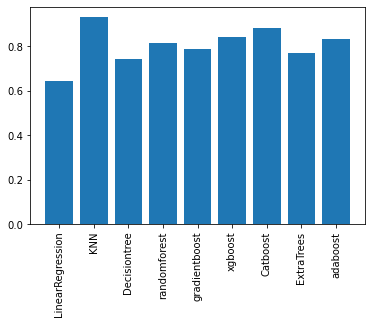

In [225]:
plt.bar(Model_s_evaluation["Regressor Models"],Model_s_evaluation["r square"])
plt.xticks(rotation=90)

####  Step 6:  Conclusion

In this notebook, I have done cleaning , feature engineering ,extracted hidden insights and see the data trends with respect to price from business and buyers point of view and also enables buyers how they can purchase the cars based on following factors:
1) Safety

2) Power

3) Torque

4) seating_capacity

5) Mileage

6) Extra Features

I used selectkbest and multicoolinearity as feature selection technique and prepared the data for modelling and then we applied 9 different Regressor models on data and evaluated them based on r square metric . It is found that KNN performs better with r square 93%   

